# 추정과 검정

In [3]:
# 연습 문제 9.1.1
# 보스턴 집값 데이터셋의 각 컬럼별 

%matplotlib inline

from sklearn.datasets import load_boston

boston = load_boston()

dfx = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ["MEDV"])

df = pd.concat([dfx, dfy], axis = 1)
print("* df :")
display(df)

* df :


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

* CRIM variable's description : 

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64 



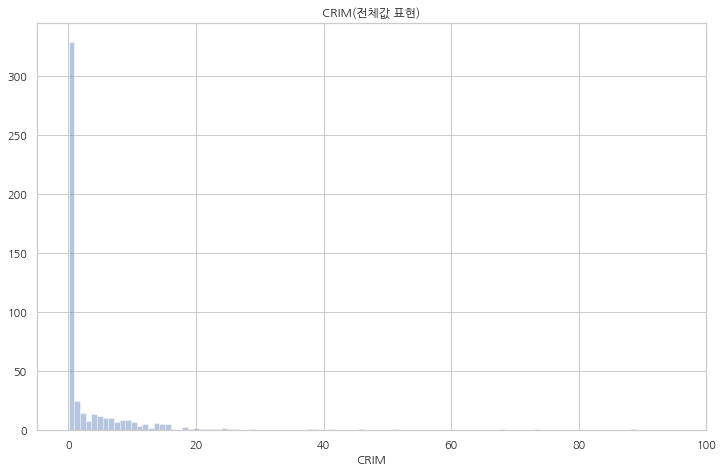

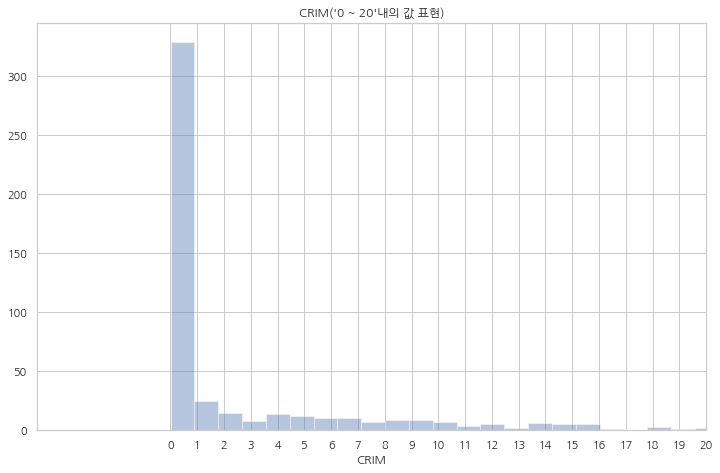

* CRIM은 0근처의 값이 가장 많은 지수분포와 유사함


In [20]:
print("* CRIM variable's description :", "\n")
print(df["CRIM"].describe(), "\n")

plt.figure(figsize = (12, 7.5))
sns.distplot(df["CRIM"], kde = False, bins = 100)
plt.xlim([-5, 100])
plt.title("CRIM(전체값 표현)")

plt.figure(figsize = (12, 7.5))
sns.distplot(df["CRIM"], kde = False, bins = 100)
plt.xlim([-5, 20])
plt.xticks([i for i in range(21)])
plt.title("CRIM('0 ~ 20'내의 값 표현)")

plt.show()

print("* CRIM은 0근처의 값이 가장 많은 지수분포와 유사함")

* ZN variable's description : 

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64 

* ZN variable's distinct data : 

0       18.0
1        0.0
6       12.5
39      75.0
50      21.0
55      90.0
56      85.0
57     100.0
58      25.0
64      17.5
65      80.0
92      28.0
187     45.0
193     60.0
199     95.0
201     82.5
238     30.0
244     22.0
257     20.0
274     40.0
285     55.0
287     52.5
298     70.0
301     34.0
304     33.0
331     35.0
Name: ZN, dtype: float64


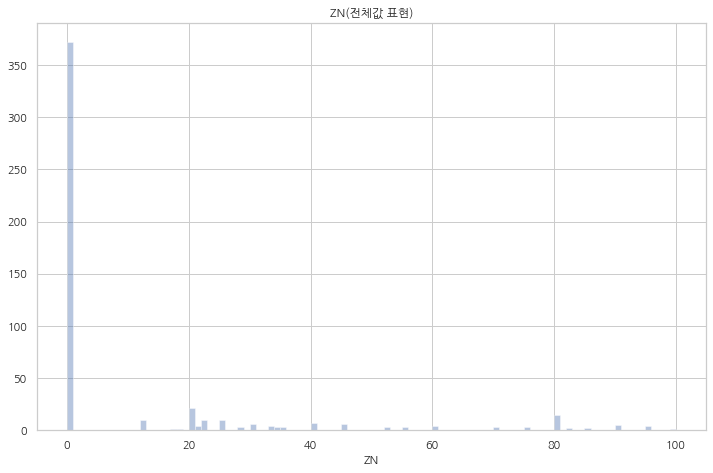

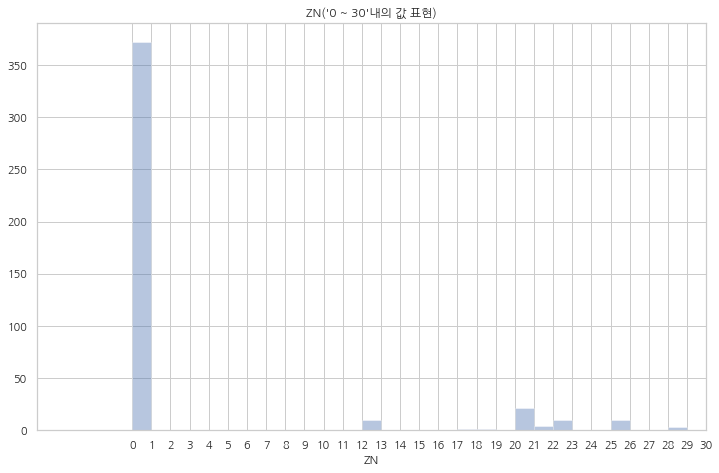

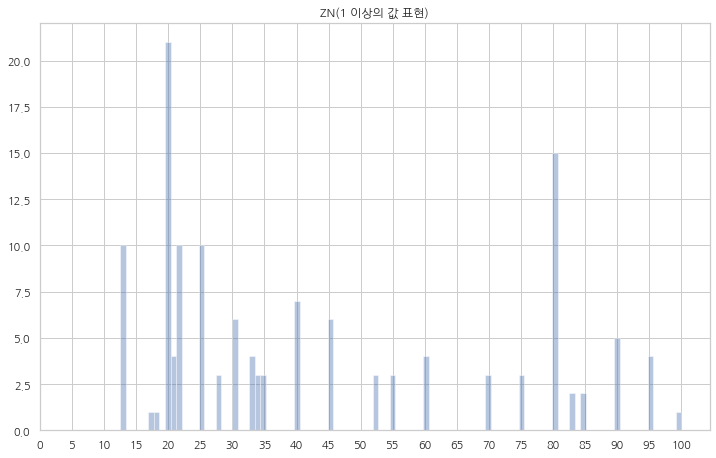

* ZN은 0부터 100까지의 균일분포와 닮았지만 0값이 다수를 차지함


In [36]:
print("* ZN variable's description :", "\n")
print(df["ZN"].describe(), "\n")
print("* ZN variable's distinct data :", "\n")
print(df["ZN"].drop_duplicates())

plt.figure(figsize = (12, 7.5))
sns.distplot(df["ZN"], bins = 100, kde = False, rug = False) # bins를 크게 설정하면, 이산변수에 대한 도수분포그래프를 표현할 수 있음
plt.title("ZN(전체값 표현)")
plt.show()

plt.figure(figsize = (12, 7.5))
sns.distplot(df["ZN"], bins = 100, kde = False, rug = False)
plt.xlim([-5, 30])
plt.xticks([i for i in range(31)])
plt.title("ZN('0 ~ 30'내의 값 표현)")
plt.show()

plt.figure(figsize = (12, 7.5))
sns.distplot(df.loc[df["ZN"] >= 1, ["ZN"]], bins = 100, kde = False, rug = False)
plt.xticks([i*5 for i in range(21)])
plt.title("ZN(1 이상의 값 표현)")
plt.show()

print("* ZN은 0부터 100까지의 균일분포와 닮았지만 0값이 다수를 차지함")

* INDUS variable's description : 

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64


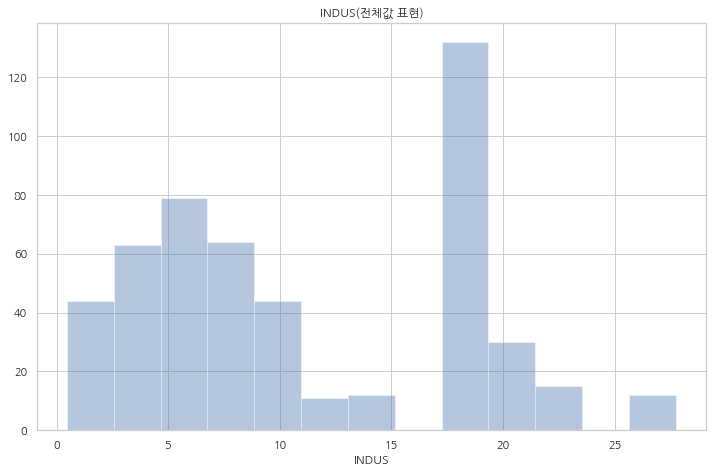

* INDUS는 다봉분포의 모양을 가짐


In [35]:
import math

print("* INDUS variable's description :", "\n")
print(df["INDUS"].describe())

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["INDUS"], kde = False, rug = False, bins = bins)
plt.title("INDUS(전체값 표현)")
plt.show()

print("* INDUS는 다봉분포의 모양을 가짐")

* CHAS variable's description : 

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64


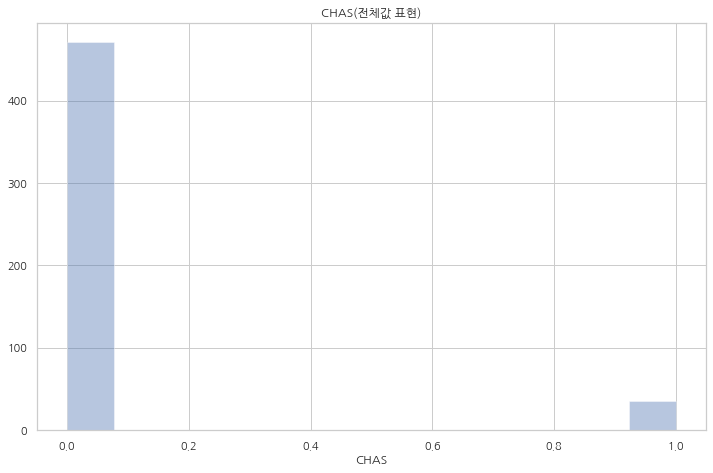

* CHAS는 베르누이분포를 따름


In [40]:
print("* CHAS variable's description :", "\n")
print(df["CHAS"].describe())

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["CHAS"], kde = False, rug = False, bins = bins)
plt.title("CHAS(전체값 표현)")
plt.show()

print("* CHAS는 베르누이분포를 따름")

* NOX variable's description : 

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64


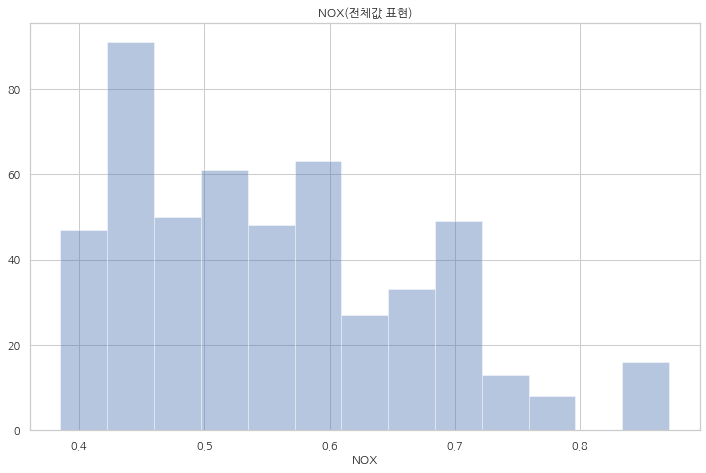

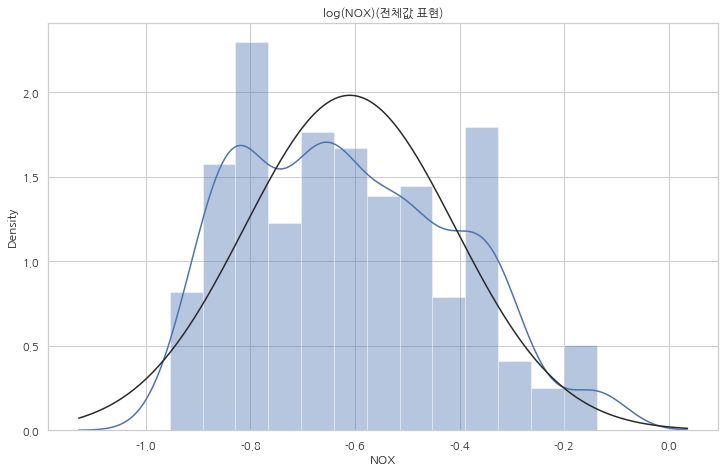

* NOX는 로그정규분포를 따르는 것처럼 보임


In [47]:
print("* NOX variable's description :", "\n")
print(df["NOX"].describe())

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["NOX"], kde = False, rug = False, bins = bins)
plt.title("NOX(전체값 표현)")
plt.show()

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(np.log(df["NOX"]), kde = True, fit = sp.stats.norm, rug = False, bins = bins)
plt.title("log(NOX)(전체값 표현)")
plt.show()

print("* NOX는 로그정규분포를 따르는 것처럼 보임")

* RM variable's description : 

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64


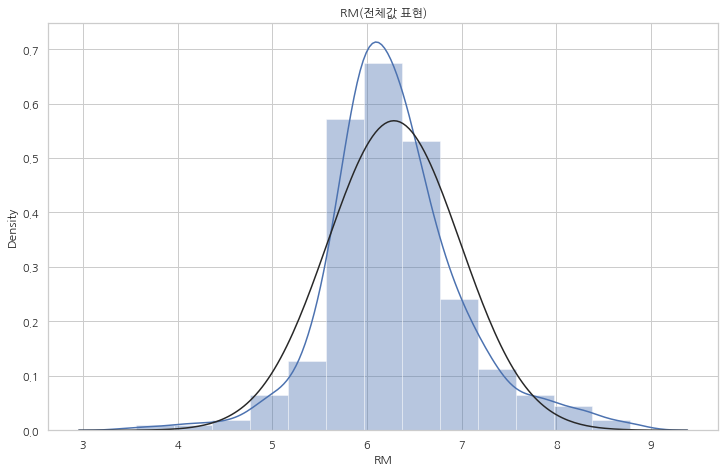

* RM은 정규분포를 따르는 것처럼 보임


In [51]:
print("* RM variable's description :", "\n")
print(df["RM"].describe())

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["RM"], kde = True, rug = False, bins = bins, fit = sp.stats.norm)
plt.title("RM(전체값 표현)")
plt.show()

print("* RM은 정규분포를 따르는 것처럼 보임")

* AGE variable's description : 

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64


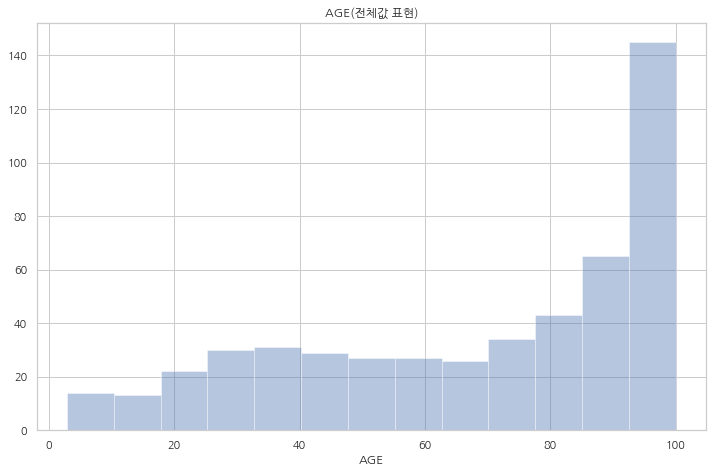

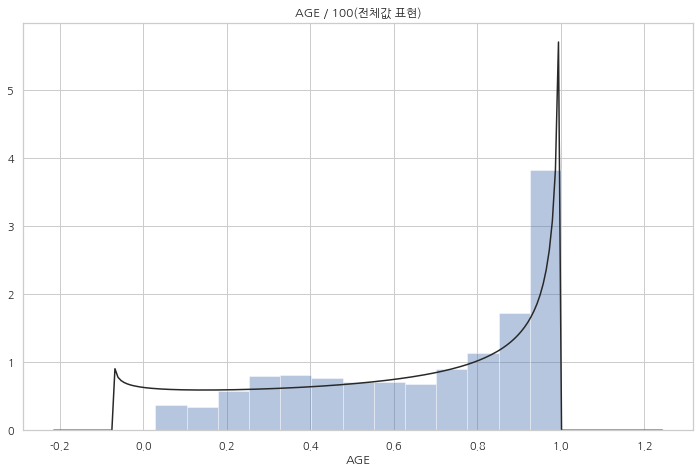

* AGE는 0부터 100 사이의 값만 표현할 수 있으므로 베타분포로 나타낼 수 있음


In [55]:
print("* AGE variable's description :", "\n")
print(df["AGE"].describe())

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["AGE"], kde = False, rug = False, bins = bins)
plt.title("AGE(전체값 표현)")
plt.show()

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["AGE"] / 100, kde = False, rug = False, bins = bins, fit = sp.stats.beta)
plt.title("AGE / 100(전체값 표현)")
plt.show()

print("* AGE는 0부터 100 사이의 값만 표현할 수 있으므로 베타분포로 나타낼 수 있음")

* DIS variable's description : 

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64


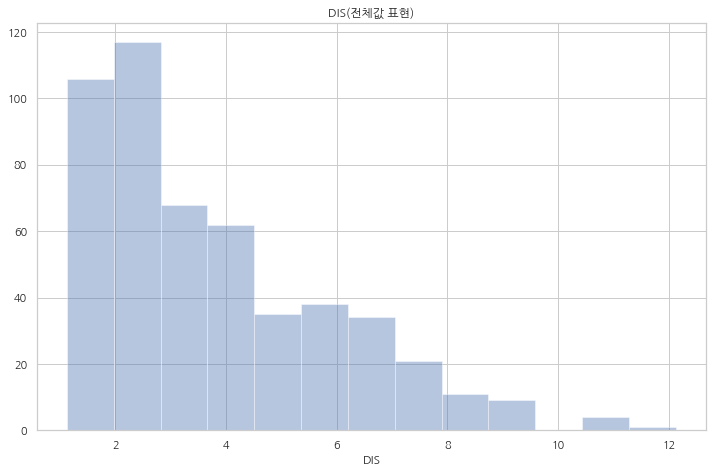

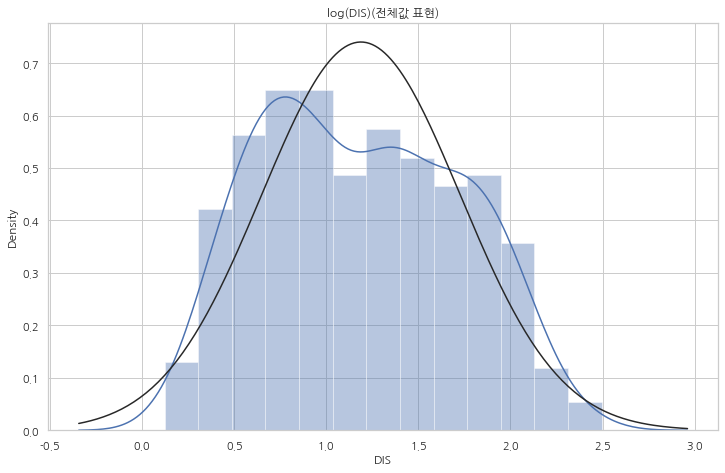

* DIS는 로그정규분포와 비슷함


In [9]:
import math

print("* DIS variable's description :", "\n")
print(df["DIS"].describe())

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["DIS"], kde = False, rug = False, bins = bins)
plt.title("DIS(전체값 표현)")
plt.show()

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(np.log(df["DIS"]), kde = True, rug = False, bins = bins, fit = sp.stats.norm)
plt.title("log(DIS)(전체값 표현)")
plt.show()

print("* DIS는 로그정규분포와 비슷함")

* RAD variable's description : 

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64 

* RAD distinct : 

0       1.0
1       2.0
3       3.0
6       5.0
13      4.0
58      8.0
111     6.0
244     7.0
356    24.0
Name: RAD, dtype: float64


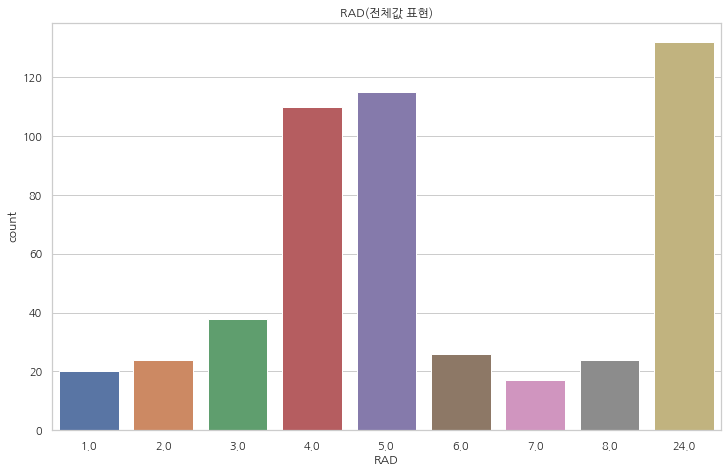

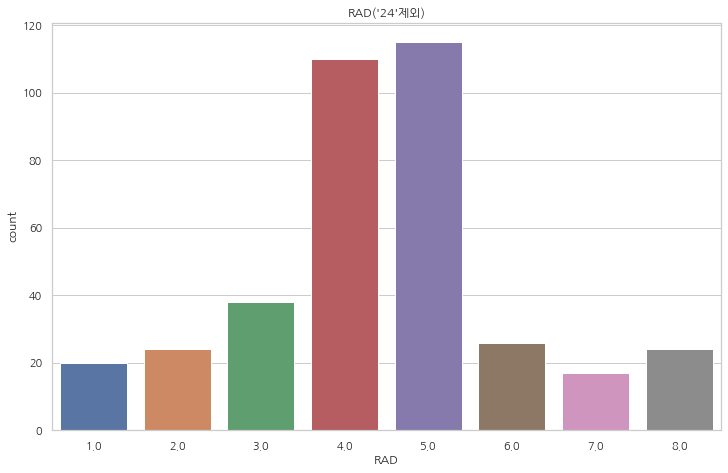

* RAD는 정규분포와 비슷하지만, '24'값의 빈도가 높음


In [36]:
import math

print("* RAD variable's description :", "\n")
print(df["RAD"].describe(), "\n")

print("* RAD distinct :", "\n")
print(df["RAD"].drop_duplicates())

plt.figure(figsize = (12, 7.5))
sns.countplot(df["RAD"])
plt.title("RAD(전체값 표현)")
plt.show()

plt.figure(figsize = (12, 7.5))
sns.countplot(df.loc[df["RAD"] != 24, ["RAD"]]["RAD"]) # 'sns.countplot()'의 매개변수는 Series type임
plt.title("RAD('24'제외)")
plt.show()

print("* RAD는 정규분포와 비슷하지만, '24'값의 빈도가 높음")

* TAX variable's description : 

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64 

* TAX distinct : 

count     66.000000
mean     313.454545
std       94.985858
min      187.000000
25%      252.500000
50%      291.000000
75%      350.250000
max      711.000000
Name: TAX, dtype: float64 



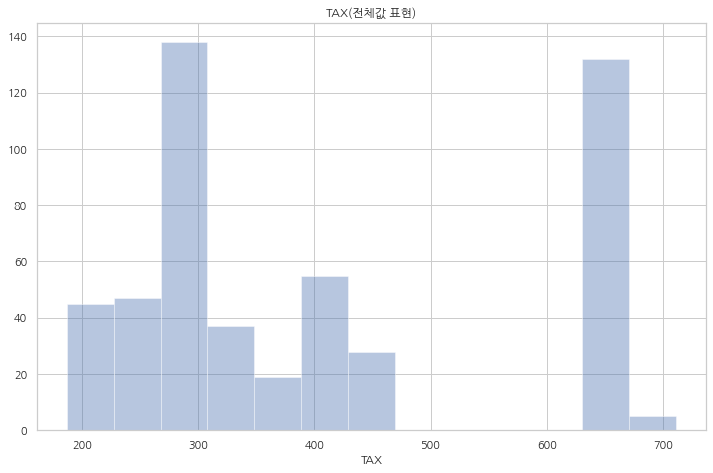

* TAX over 600 count : 137


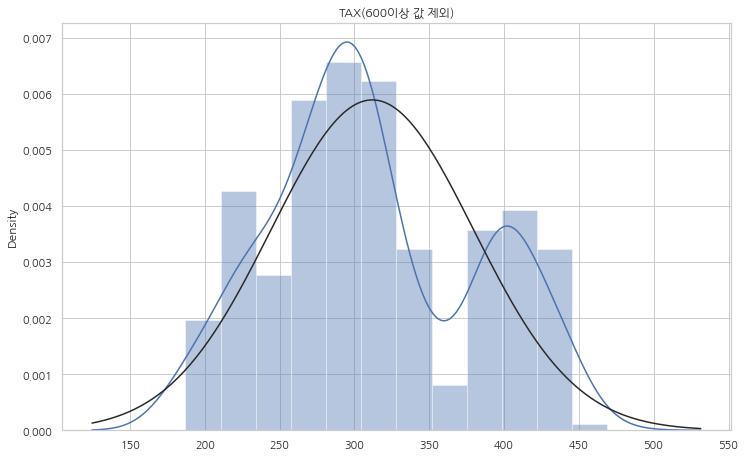

* TAX는 600이상의 값을 제외했을 시, 정규분포와 비슷한 것처럼 보임


In [11]:
import math

print("* TAX variable's description :", "\n")
print(df["TAX"].describe(), "\n")

print("* TAX distinct :", "\n")
print(df["TAX"].drop_duplicates().describe(), "\n")

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["TAX"], kde = False, rug = False, bins = bins)
plt.title("TAX(전체값 표현)")
plt.show()

print("* TAX over 600 count :", len(df.loc[df["TAX"] >= 600]))

except_data_count = len(df.loc[df["TAX"] >= 600])

plt.figure(figsize = (12, 7.5))
bins_considering_except_data_count = int(5 * math.log10(506 - except_data_count))
sns.distplot(df.loc[df["TAX"] < 600, ["TAX"]], kde = True, rug = False, bins = bins_considering_except_data_count, fit = sp.stats.norm)
plt.title("TAX(600이상 값 제외)")
plt.show()

print("* TAX는 600이상의 값을 제외했을 시, 정규분포와 비슷한 것처럼 보임")

* PTRATIO variable's description : 

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64 



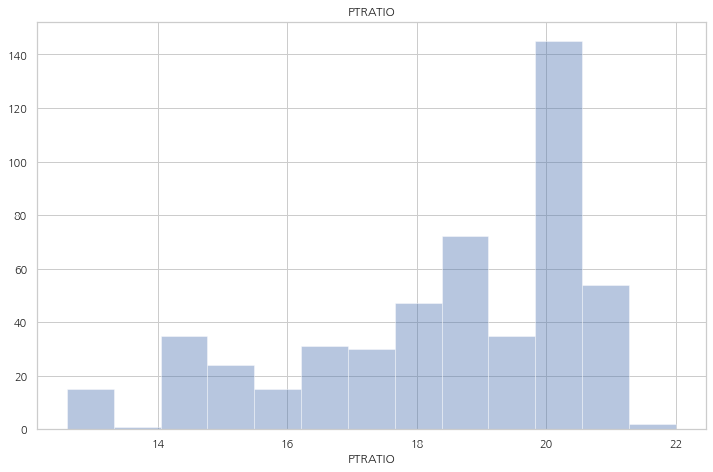

* 일반적인 pdf 확률분포로 추정하기 난해함


In [14]:
print("* PTRATIO variable's description :", "\n")
print(df["PTRATIO"].describe(), "\n")

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["PTRATIO"], kde = False, rug = False, bins = bins)
plt.title("PTRATIO")
plt.show()

print("* 일반적인 pdf 확률분포로 추정하기 난해함")

* B variable's description : 

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64 



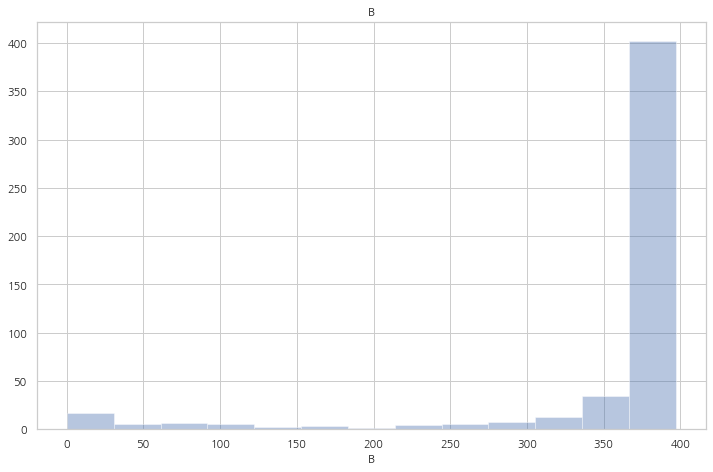

* 일반적인 pdf 확률분포로 추정하기 난해함


In [15]:
print("* B variable's description :", "\n")
print(df["B"].describe(), "\n")

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["B"], kde = False, rug = False, bins = bins)
plt.title("B")
plt.show()

print("* 일반적인 pdf 확률분포로 추정하기 난해함")

* LSTAT variable's description : 

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64 



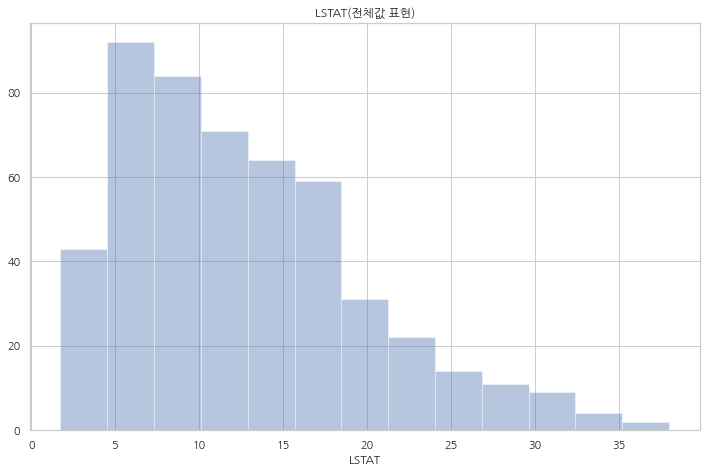

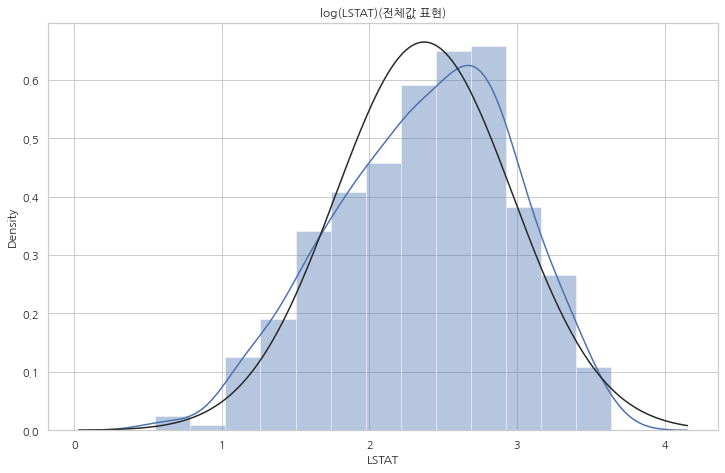

* LSTAT의 분포는 로그정규분포와 비슷함


In [12]:
import math

print("* LSTAT variable's description :", "\n")
print(df["LSTAT"].describe(), "\n")

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["LSTAT"], kde = False, rug = False, bins = bins)
plt.title("LSTAT(전체값 표현)")
plt.show()

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(np.log(df["LSTAT"]), kde = True, rug = False, bins = bins, fit = sp.stats.norm)
plt.title("log(LSTAT)(전체값 표현)")
plt.show()

print("* LSTAT의 분포는 로그정규분포와 비슷함")

* MEDV variable's description : 

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64 



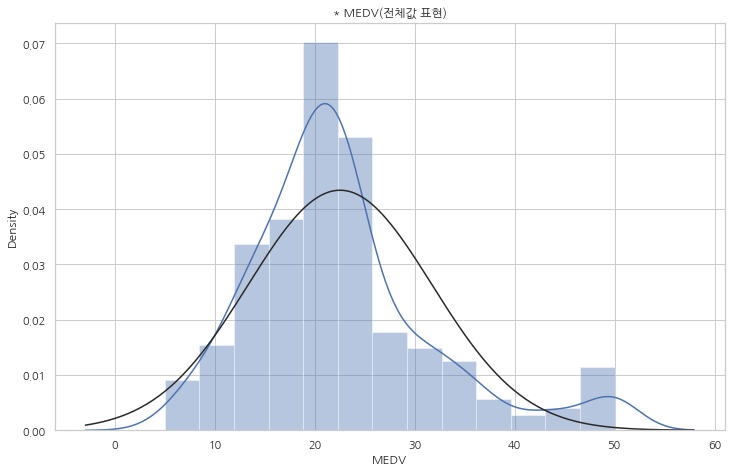

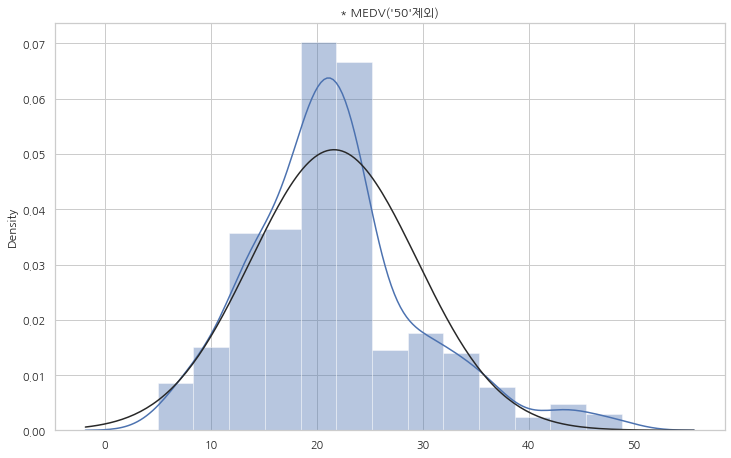

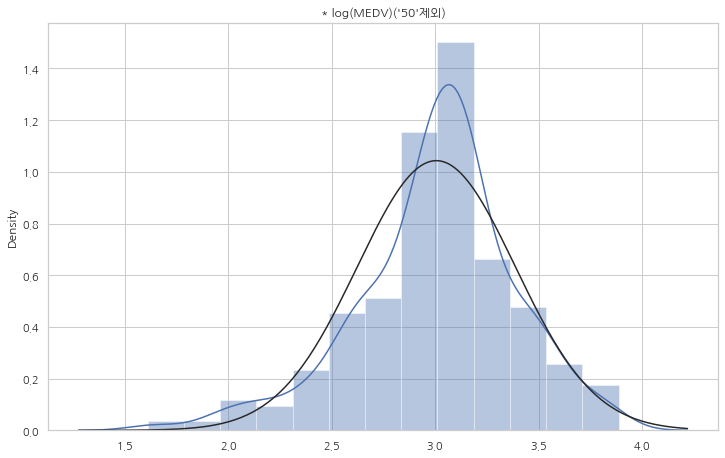

* MEDV값은 로그정규분포와 비슷하지만, 50이라는 값이 자주 나타남


In [11]:
print("* MEDV variable's description :", "\n")
print(df["MEDV"].describe(), "\n")

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df["MEDV"], kde = True, rug = False, bins = bins, fit = sp.stats.norm)
plt.title("* MEDV(전체값 표현)")
plt.show()

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(df.loc[df["MEDV"] != 50, ["MEDV"]], kde = True, rug = False, bins = bins, fit = sp.stats.norm)
plt.title("* MEDV('50'제외)")
plt.show()

plt.figure(figsize = (12, 7.5))
bins = int(5 * math.log10(506))
sns.distplot(np.log(df.loc[df["MEDV"] != 50, ["MEDV"]]), kde = True, rug = False, bins = bins, fit = sp.stats.norm)
plt.title("* log(MEDV)('50'제외)")
plt.show()

print("* MEDV값은 로그정규분포와 비슷하지만, 50이라는 값이 자주 나타남")

* 베타분포를 따르는 확률변수 X의 시뮬레이션 결과 :
[0.63237667 0.72738306 0.52096337 ... 0.51948814 0.5817893  0.78770875] 



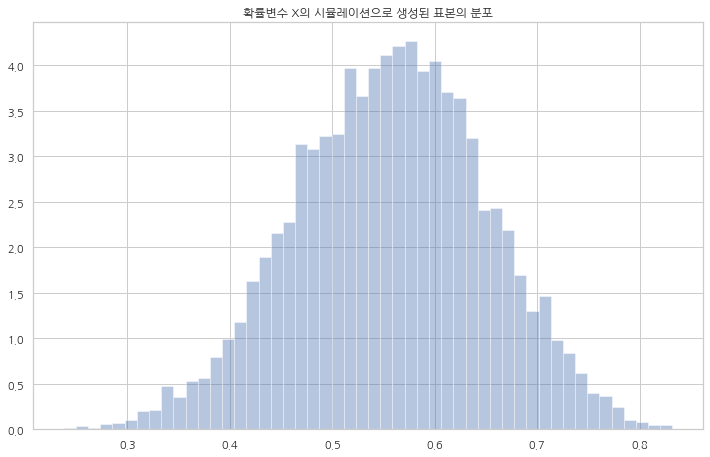

* x_bar :
0.556869752590311 

* s_square :
0.008640612432039483 

* a, b :
15.346682046700685 12.2121537049535


In [25]:
# 베타분포의 모수 추정

%matplotlib inline

def estimate_beta(x) : # 베타분포의 형상인자 산출
    
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (((x_bar * (1 - x_bar)) / s2) - 1)
    b = (1 - x_bar) * (((x_bar * (1 - x_bar)) / s2) - 1)
    return (a, b)

np.random.seed(0)

x = sp.stats.beta(15, 12).rvs(10000)
print("* 베타분포를 따르는 확률변수 X의 시뮬레이션 결과 :")
print(x, "\n")

plt.figure(figsize = (12, 7.5))
sns.distplot(x, kde = False, norm_hist = True)
plt.title("확률변수 X의 시뮬레이션으로 생성된 표본의 분포")
plt.show()

print("* x_bar :")
print(x.mean(), "\n")

print("* s_square :")
print(x.var(), "\n")

arguments = estimate_beta(x)
print("* a, b :")
print(arguments[0], arguments[1])

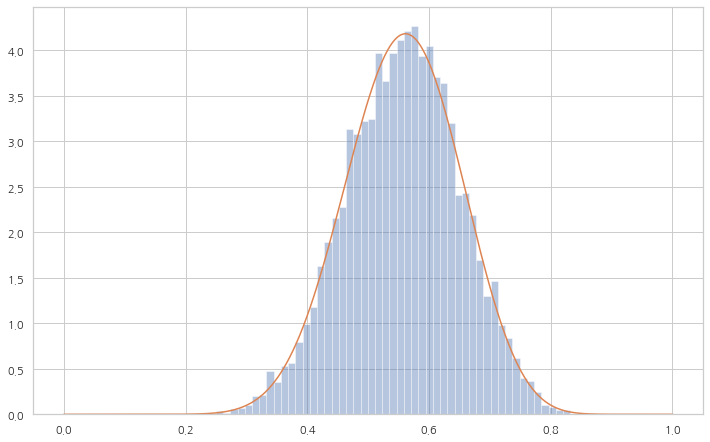

In [23]:
# 베타분포를 따르는 확률변수의 시뮬레이션 결과(표본의 분포)와 추정된 확률밀도함수

xx = np.linspace(0, 1, 1000)

plt.figure(figsize = (12, 7.5))

sns.distplot(x, kde = False, norm_hist = True)
plt.plot(xx, sp.stats.beta(arguments[0], arguments[1]).pdf(xx))
plt.show()

* likelihood_mu :
[1.4867195147342979e-06, 1.5629451759545646e-06, 1.6429143776209077e-06, 1.726802225602747e-06, 1.8147915680031394e-06, 1.9070733153312075e-06, 2.0038467728640893e-06, 2.1053199856146367e-06, 2.211710096333239e-06, 2.3232437169845257e-06, 2.440157314152359e-06, 2.5626976088394264e-06, 2.691121991140962e-06, 2.825698950285607e-06, 2.9667085205500707e-06, 3.1144427435683705e-06, 3.269206147570631e-06, 3.4313162441010406e-06, 3.6011040427793162e-06, 3.778914584685238e-06, 3.9651074949611e-06, 4.160057555242689e-06, 4.3641552965451725e-06, 4.577807613246672e-06, 4.801438398828609e-06, 5.0354892040487905e-06, 5.280419918240034e-06, 5.536709474444599e-06, 5.804856579112089e-06, 6.085380467106363e-06, 6.378821682784907e-06, 6.685742887932589e-06, 7.006729697350161e-06, 7.342391542916562e-06, 7.693362566963276e-06, 8.060302545818064e-06, 8.44389784439499e-06, 8.844862402727114e-06, 9.263938755358373e-06, 9.701899084530991e-06, 1.0159546308125239e-05, 1.0637715203328493e-05, 1

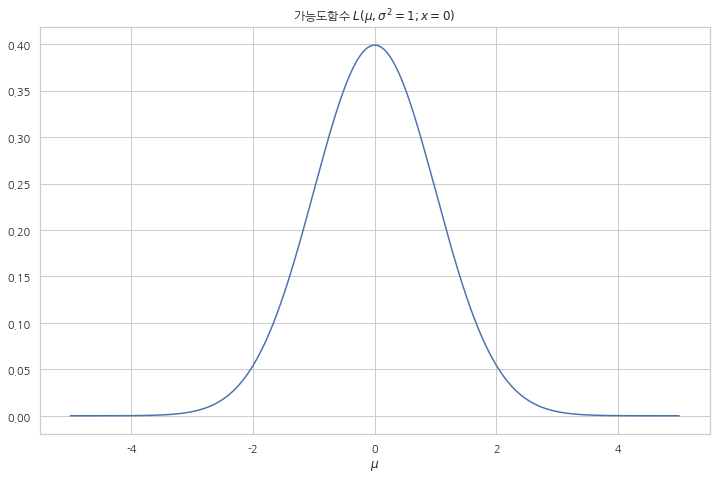

In [5]:
# 정규분포의 가능도함수(표본이 '{0}'이고 모표준편차가 '1'로 주어진 경우, 해당 함수의 변수 : 모평균)

%matplotlib inline

def likelihood_mu(mu) :
    
    return sp.stats.norm(loc = mu).pdf(0)

mus = np.linspace(-5, 5, 1000)
likelihood_mu = [likelihood_mu(mu) for mu in mus]
print("* likelihood_mu :")
print(likelihood_mu)

plt.figure(figsize = (12, 7.5))
plt.plot(mus, likelihood_mu)
plt.title("가능도함수 $L(\mu, \sigma^2 = 1; x = 0)$")
plt.xlabel("$\mu$")
plt.show()

* likelihood_sigma2 :
[1.2615662610100802, 1.2033491066159787, 1.1525127397466044, 1.107618776023604, 1.0675929719489836, 1.0316146743515102, 0.9990447042473962, 0.9693768200855483, 0.9422041591649646, 0.9171954842577865, 0.8940780201006883, 0.8726248226886686, 0.8526453313289488, 0.8339781970752386, 0.8164857665098774, 0.8000497874725025, 0.7845680292020611, 0.7699515953407708, 0.7561227679636568, 0.7430132629031677, 0.7305628067443612, 0.7187179676706592, 0.7074311883212689, 0.6966599806644208, 0.6863662517577699, 0.6765157359703867, 0.6670775143536026, 0.6580236057807617, 0.6493286175250572, 0.6409694453262724, 0.6329250148706308, 0.6251760580913411, 0.6177049188793817, 0.6104953837414566, 0.6035325337057191, 0.5968026143947384, 0.5902929216892723, 0.5839917008190185, 0.5778880570557934, 0.5719718764648082, 0.566233755402142, 0.5606649376400661, 0.5552572581636932, 0.5500030928182091, 0.5448953131002888, 0.539927245483915, 0.5350926347527303, 0.5303856108807113, 0.5258006590623756, 

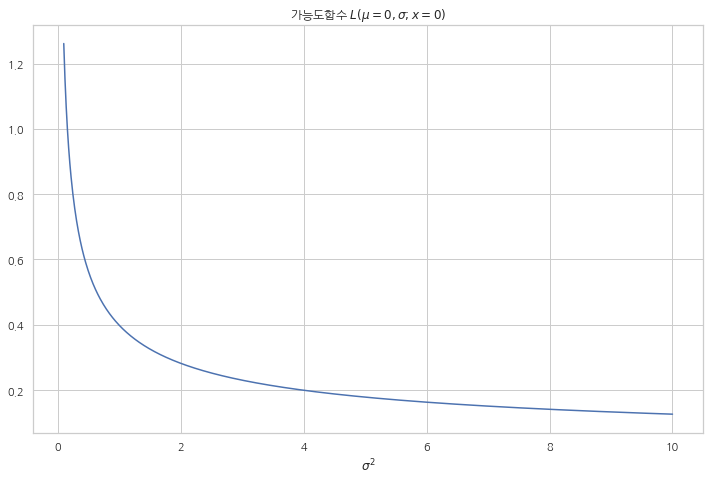

In [6]:
# 정규분포의 가능도함수(표본이 '{0}'이고 모평균이 '0'으로 주어진 경우, 해당 함수의 변수 : 모표준편차)

def likelihood_sigma2(sigma2) :
    
    return sp.stats.norm(scale = np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1, 10, 1000)
likelihood_sigma2 = [likelihood_sigma2(sigma2) for sigma2 in sigma2s]
print("* likelihood_sigma2 :")
print(likelihood_sigma2)

plt.figure(figsize = (12, 7.5))
plt.plot(sigma2s, likelihood_sigma2)
plt.title("가능도함수 $L(\mu = 0, \sigma; x = 0)$")
plt.xlabel("$\sigma^2$")
plt.show()

----------------------------------------------------------------
meshgird() result!!! 

* MU :
[[-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]
 [-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]
 [-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]
 ...
 [-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]
 [-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]
 [-5.         -4.98998999 -4.97997998 ...  4.97997998  4.98998999
   5.        ]] 

* SIGMA2
[[ 0.1         0.1         0.1        ...  0.1         0.1
   0.1       ]
 [ 0.10990991  0.10990991  0.10990991 ...  0.10990991  0.10990991
   0.10990991]
 [ 0.11981982  0.11981982  0.11981982 ...  0.11981982  0.11981982
   0.11981982]
 ...
 [ 9.98018018  9.98018018  9.98018018 ...  9.98018018  9.98018018
   9.98018018]
 [ 9.99009009  9.99009009  9.99009009 ...  9.99009009  9.99009009
   9.99009009]

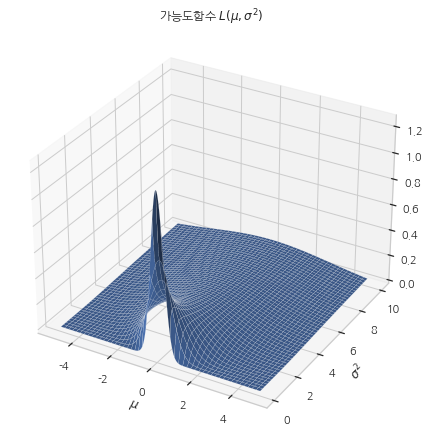

In [2]:
# 정규분포의 가능도함수(표본이 '{0}'이고 모평균과 모표준편차 모두 주어지지 않은 경우, 해당 함수의 변수 : 모평균, 모표준편차)

%matplotlib inline

mus = np.linspace(-5, 5, 1000)
sigma2s = np.linspace(0.1, 10, 1000)

print("----------------------------------------------------------------")
print("meshgird() result!!!", "\n")
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
print("* MU :")
print(MU, "\n")
print("* SIGMA2")
print(SIGMA2, "\n")

print("----------------------------------------------------------------")
L = np.exp((-MU ** 2) / (2 * SIGMA2)) / np.sqrt(2 * np.pi * SIGMA2)

fig = plt.figure(figsize = (12, 7.5))
ax = fig.gca(projection = "3d")
ax.plot_surface(MU, SIGMA2, L, linewidth = 0.1)
plt.xlabel("$\mu$")
plt.ylabel("$\sigma^2$")
plt.title("가능도함수 $L(\mu, \sigma^2)$")
plt.show()

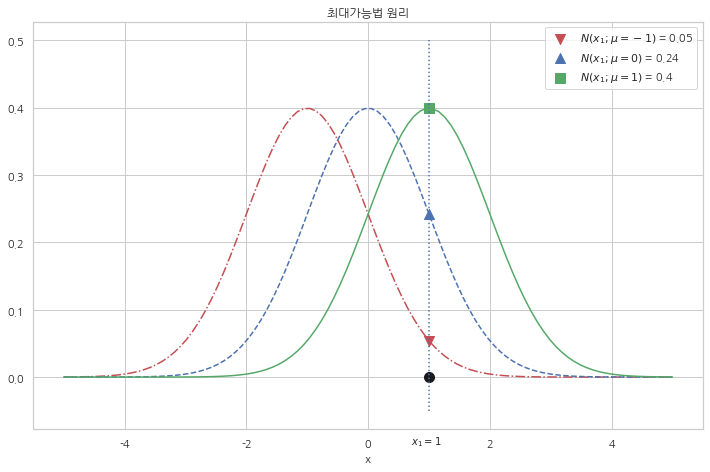

In [3]:
# 정규분포를 따르는 확률변수의 표준편차는 '1'이고, 해당 확률변수의 시뮬레이션 결과가 '{1}'일 때,
# '최대가능도법'을 활용하여 해당 확률변수의 기대값을 추정하는 방법
# 해당 확률변수의 기대값 후보 : -1, 0, 1

x = np.linspace(-5, 5, 100)

p1 = sp.stats.norm(loc = -1).pdf(1)
p2 = sp.stats.norm(loc = 0).pdf(1)
p3 = sp.stats.norm(loc = 1).pdf(1)

plt.figure(figsize = (12, 7.5))
plt.scatter(1, p1, s = 100, c = "r", marker = "v", label = "$N(x_1;\mu=-1)$ = {}".format(np.round(p1, 2)))
plt.scatter(1, p2, s = 100, c = "b", marker = "^", label = "$N(x_1;\mu=0)$ = {}".format(np.round(p2, 2)))
plt.scatter(1, p3, s = 100, c = "g", marker = "s", label = "$N(x_1;\mu=1)$ = {}".format(np.round(p3, 2)))

plt.plot(x, sp.stats.norm(loc = -1).pdf(x), ls = "-.", c = "r")
plt.plot(x, sp.stats.norm(loc = 0).pdf(x), ls = "--", c = "b")
plt.plot(x, sp.stats.norm(loc = 1).pdf(x), c = "g")

plt.vlines(1, -0.05, 0.5, linestyle=":")
plt.scatter(1, 0, s = 100, c = "k")
plt.text(0.7, -0.1, "$x_1=1$")

plt.xlabel("x")
plt.title("최대가능법 원리")
plt.legend()
plt.show()

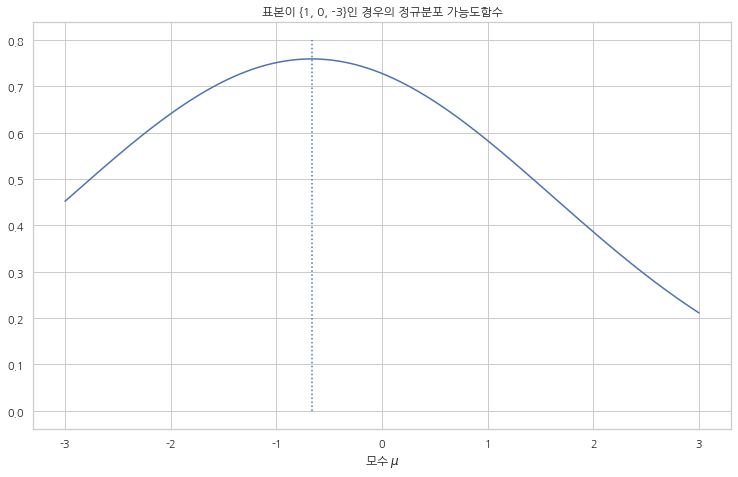

* 위 함수 기준, '-2/3'에서의 기울기 : 0


In [24]:
# 표본이 복수개의 요소로 구성되는 경우의 가능도함수
# 정규분포를 따르는 확률변수의 표준편차 = 1
# 해당 확률변수의 시뮬레이션 결과(포본) = {1, 0, -3}

%matplotlib inline
import sympy

mus = np.linspace(-3, 3, 1000)
sigma2 = 1

def likelihood(mu) :
    
    return np.exp(-(3 * mu**2 + 4 * mu + 10) / (2 * sigma2) / (2 * np.pi * sigma2)**(3/2))

likelihoods = likelihood(mus)

plt.figure(figsize = (12.5, 7.5))
plt.plot(mus, likelihoods)
plt.vlines(-2/3, 0, 0.8, linestyle = ":")
plt.xlabel("모수 $\mu$")
plt.title("표본이 {1, 0, -3}인 경우의 정규분포 가능도함수")
plt.show()

sympy.init_printing(use_latex = "mathjax")
x = sympy.symbols("x")
f = (sympy.exp((-3*(x + (2/3))**2 + 26/3) / 2)) / ((2*sympy.pi)**(3/2)) 
df = f.diff()
slope = df.subs({x:-2/3})


print("* 위 함수 기준, '-2/3'에서의 기울기 :", slope)

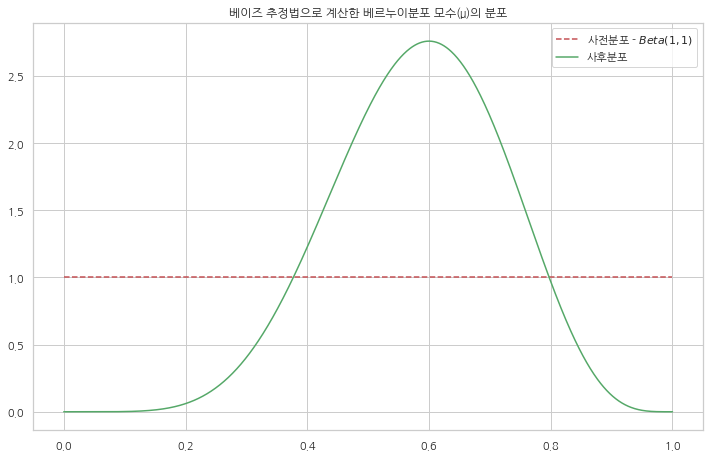

In [10]:
"""

- 베이즈 추정법 : 모수값이 가질 수 있는 모든 가능성의 분포를 계산하는 작업
                  즉, 모수를 '확률변수'로 여김(최대가능도 추정법과의 차이점)

- 베이즈 추정법 요소
1.사전분포 : 베이지안 추정 작업흘 하기 전에 이미 알고 있던 모수의 분포
             모수의 분포에 대해 아무런 지식이 없는 경우에는 균일 분포 'Beta(1,1)'' 또는 0을 중심으로 하는 'N(0, sigma2)'등의 무정보분포를 사용
2.사후분포 : 표본이 주어진 상태에서의 모수에 대한 조건부 확률 분포
             우리가 베이즈 추정법을 통해 구하고자 하는 것
3.가능도   : 모수가 특정한 값으로 주어졌을 때 주어진 표본이 나올 수 있는 확률값 

- 켤레 사전확률분포 : 사전분포와 사후분포가 모수값만 다르고 함수 형태가 같은 확률밀도함수로 표현될 수 있도록 해주는 사전분포

- 하이퍼모수        : 모수 분포를 표현하는 확률분포함수의 모수

"""

# 예제 : 동전을 10번 던져서 앞면이 6번 나옴
#        이 때 사전분포가 하이퍼모수 a = b = 1인 베타분포라면, 사후분포는 다음과 같은 하이퍼모수를 가지는 베타분포가 됨        

%matplotlib inline

xx = np.linspace(0, 1, 1000)

a = 1
b = 1
N1 = 6
N0 = 4

plt.figure(figsize = (12, 7.5))
plt.plot(xx, sp.stats.beta(a, b).pdf(xx), c = "r", ls = "--", label = "사전분포 - $Beta(1, 1)$")

a = a + N1
b = b + N0
plt.plot(xx, sp.stats.beta(a, b).pdf(xx), c = "g", ls = "-", label = "사후분포")

plt.legend()
plt.title("베이즈 추정법으로 계산한 베르누이분포 모수(\u03BC)의 분포")
plt.show()

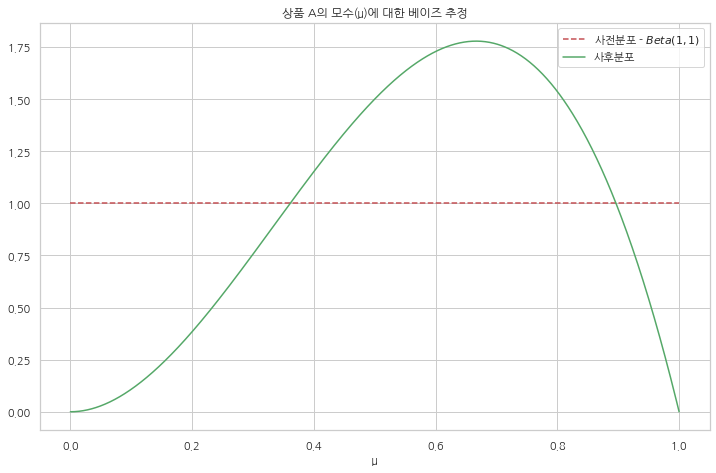

* 기대값 : 0.6
* 최빈값 :0.6666666666666666
* 분산   : 0.04 



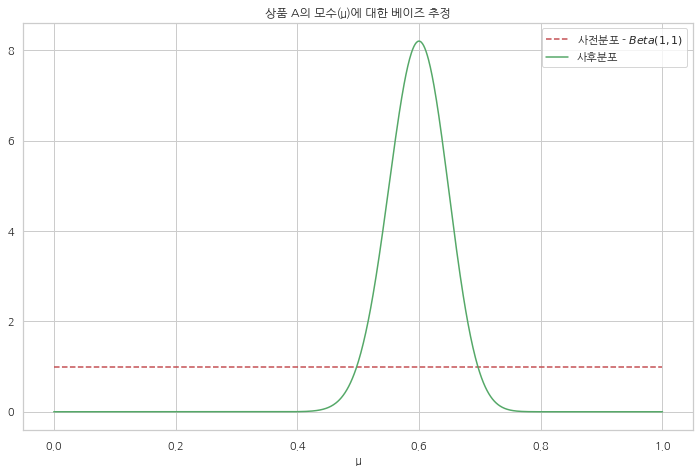

* 기대값 : 0.5980392156862745
* 최빈값 :0.6
* 분산   : 0.002333867108617671 



In [19]:
# 연습문제 : 상품 A와 상품 B의 베르누이 모수의 사후분포의 하이퍼파라미터를 구하고 각각 사후분포 확률밀도함수를 그릴 것

# 상품 A : 전체 평가의견 3개, 좋아요 2개, 싫어요 1개
# 상품 B : 전체 평가의견 100개, 좋아요 60개, 싫어요 40개

from termcolor import colored

xx = np.linspace(0, 1, 1000)

product_A_a = 1
product_A_b = 1

plt.figure(figsize = (12, 7.5))

plt.plot(xx, sp.stats.beta(product_A_a, product_A_b).pdf(xx), c = "r", ls = "--", label = "사전분포 - $Beta(1, 1)$")

product_A_a = product_A_a + 2
product_A_b = product_A_b + 1

plt.plot(xx, sp.stats.beta(product_A_a, product_A_b).pdf(xx), c = "g", ls = "-", label = "사후분포")

plt.legend()
plt.title("상품 A의 모수(\u03BC)에 대한 베이즈 추정")
plt.xlabel("\u03BC")
plt.show()

print("* 기대값 :", product_A_a / (product_A_a + product_A_b))
print(colored("* 최빈값 :" + str((product_A_a - 1) / (product_A_a + product_A_b - 2)), 'red', attrs=['bold']))
print("* 분산   :", (product_A_a * product_A_b) / ((product_A_a + product_A_b)**2 * (product_A_a + product_A_b + 1)), "\n")

product_B_a = 1
product_B_b = 1

plt.figure(figsize = (12, 7.5))

plt.plot(xx, sp.stats.beta(product_B_a, product_B_b).pdf(xx), c = "r", ls = "--", label = "사전분포 - $Beta(1, 1)$")

product_B_a = product_B_a + 60
product_B_b = product_B_b + 40

plt.plot(xx, sp.stats.beta(product_B_a, product_B_b).pdf(xx), c = "g", ls = "-", label = "사후분포")

plt.legend()
plt.title("상품 A의 모수(\u03BC)에 대한 베이즈 추정")
plt.xlabel("\u03BC")
plt.show()

print("* 기대값 :", product_B_a / (product_B_a + product_B_b))
print(colored("* 최빈값 :" + str((product_B_a - 1) / (product_B_a + product_B_b - 2)), 'red', attrs=['bold']))
print("* 분산   :", (product_B_a * product_B_b) / ((product_B_a + product_B_b)**2 * (product_B_a + product_B_b + 1)), "\n")

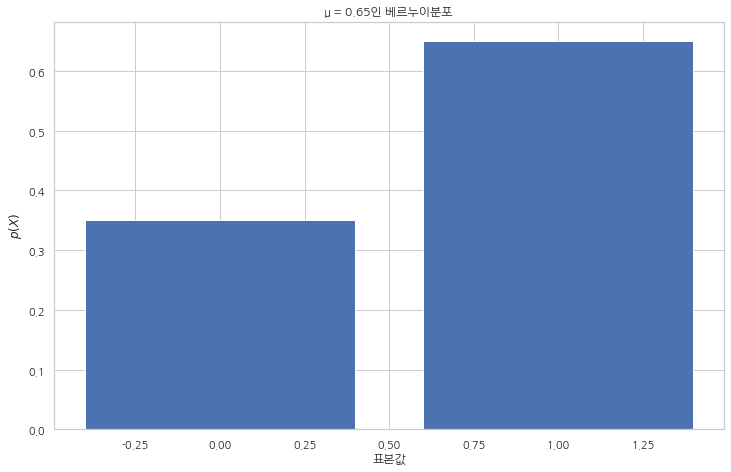

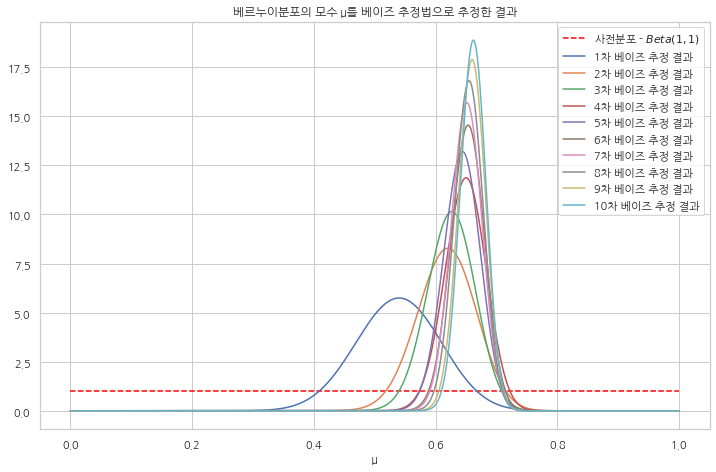

* 1차 기대값 : 0.5384615384615384
* 1차 최빈값 : 0.54
* 1차 분산   : 0.0046890700011164455 

* 2차 기대값 : 0.6176470588235294
* 2차 최빈값 : 0.62
* 2차 분산   : 0.002292807471360903 

* 3차 기대값 : 0.625
* 3차 최빈값 : 0.6266666666666667
* 3차 분산   : 0.0015318627450980392 

* 4차 기대값 : 0.6485148514851485
* 4차 최빈값 : 0.65
* 4차 분산   : 0.0011228735905829768 

* 5차 기대값 : 0.6428571428571429
* 5차 최빈값 : 0.644
* 5차 분산   : 0.0009074776155521497 

* 6차 기대값 : 0.652317880794702
* 6차 최빈값 : 0.6533333333333333
* 6차 분산   : 0.0007485124197696731 

* 7차 기대값 : 0.6505681818181818
* 7차 최빈값 : 0.6514285714285715
* 7차 분산   : 0.0006439921320792265 

* 8차 기대값 : 0.654228855721393
* 8차 최빈값 : 0.655
* 8차 분산   : 0.0005613237222403715 

* 9차 기대값 : 0.6592920353982301
* 9차 최빈값 : 0.66
* 9차 분산   : 0.0004958632394231545 

* 10차 기대값 : 0.6613545816733067
* 10차 최빈값 : 0.662
* 10차 분산   : 0.00044525785084101826 



In [36]:
"""

- 베이즈 추정법의 장점 : '순차적 계산'이 가능함
                         예를 들어 매일 50개의 데이터를 수집하는 경우를 가정했을 때, 베이즈 추정법을 사용하면 첫날 50개의 데이터로 모수를 추정한 뒤
                         다음날에는 추가적인 데이터 50개를 사용하여 모수값을 더 정확하게 수정할 수 있음
                         이 과정에서 계산량은 증가하지 않으며, 그 다음 날도 마찬가지임

"""

# 예제 : 아래 그림은 실제 모수값이 0.65인 베르누이분포에 대해 베이즈 추정법을 한 결과임
#        처음에는 데이터 50개로 모수를 추정했으며, 다음에는 데이터 50개를 추가했음
#        이런 방식으로 데이터 개수가 200개까지 증가할 때 추정 결과가 어떻게 달라지는지를 나타냄

xx = [0, 1]
mu = 0.65

plt.figure(figsize = (12, 7.5))
plt.bar(xx, sp.stats.bernoulli(0.65).pmf(xx))
plt.title("\u03BC = 0.65인 베르누이분포")
plt.xlabel("표본값")
plt.ylabel("$p(X)$")
plt.show()

plt.figure(figsize = (12, 7.5))

a = 1
b = 1

xx = np.linspace(0, 1, 1000)

plt.plot(xx, sp.stats.beta(a, b).pdf(xx), c = "red", ls = "--", label = "사전분포 - $Beta(1, 1)$")

result_list = []
for i in range(10) :
    
    n0, n1 = np.bincount(sp.stats.bernoulli(0.65).rvs(50), minlength = 2)
    a = a + n1
    b = b + n0
    plt.plot(xx, sp.stats.beta(a, b).pdf(xx), ls = "-", label = "{}차 베이즈 추정 결과".format(i + 1))
    result_list.append([a / (a + b), (a - 1) / (a + b - 2), (a * b) / ((a + b)**2 * (a + b + 1))])

plt.legend()
plt.xlabel("\u03BC")
plt.title("베르누이분포의 모수 \u03BC를 베이즈 추정법으로 추정한 결과")
plt.show()

for j in range(len(result_list)) : 
    print("* {}차 기대값 :".format(j+1), result_list[j][0])
    print("* {}차 최빈값 :".format(j+1), result_list[j][1])
    print("* {}차 분산   :".format(j+1), result_list[j][2], "\n")

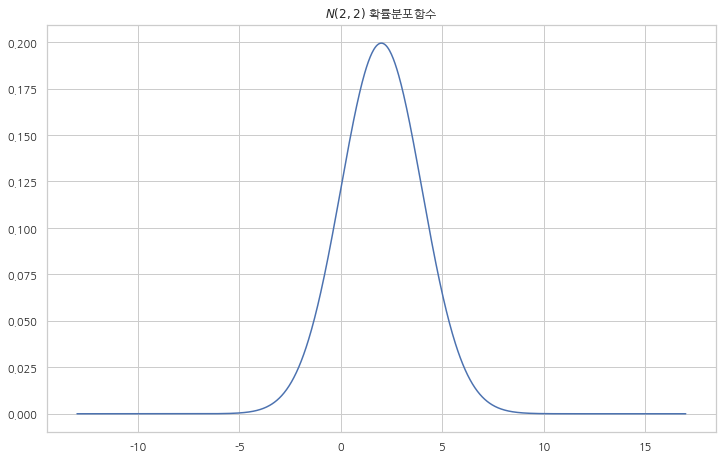

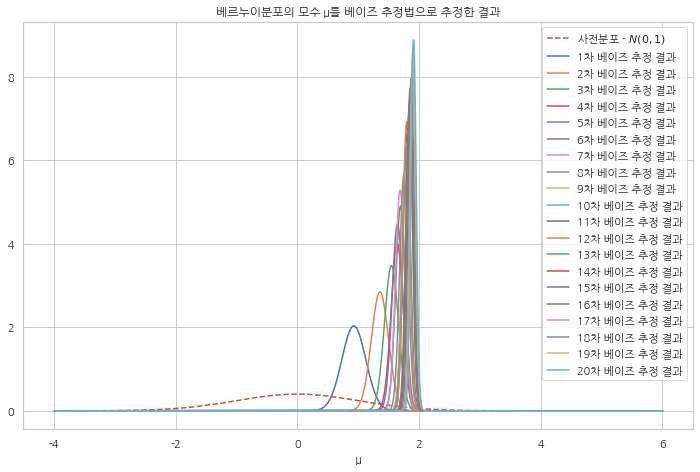

* 1차 기대값 : 0.9291073255273479
* 1차 분산   : 0.038461538461538464 

* 2차 기대값 : 1.3582606342217394
* 2차 분산   : 0.0196078431372549 

* 3차 기대값 : 1.5475565679267642
* 3차 분산   : 0.013157894736842105 

* 4차 기대값 : 1.642228922913617
* 4차 분산   : 0.009900990099009901 

* 5차 기대값 : 1.6470905307283987
* 5차 분산   : 0.007936507936507936 

* 6차 기대값 : 1.6970918037042524
* 6차 분산   : 0.006622516556291391 

* 7차 기대값 : 1.6895628733517014
* 7차 분산   : 0.005681818181818182 

* 8차 기대값 : 1.7526388632067977
* 8차 분산   : 0.004975124378109453 

* 9차 기대값 : 1.785472549385778
* 9차 분산   : 0.004424778761061947 

* 10차 기대값 : 1.7857506033438746
* 10차 분산   : 0.00398406374501992 

* 11차 기대값 : 1.7977458747051895
* 11차 분산   : 0.0036231884057971015 

* 12차 기대값 : 1.795664373051578
* 12차 분산   : 0.0033222591362126247 

* 13차 기대값 : 1.8361921442662608
* 13차 분산   : 0.003067484662576687 

* 14차 기대값 : 1.8475084169282112
* 14차 분산   : 0.002849002849002849 

* 15차 기대값 : 1.8535748069344768
* 15차 분산   : 0.0026595744680851063 

* 16차 기대값 : 1.87

In [36]:
# 예제 : 아래 그래프는 실제 기대값이 2, 분산이 4인(표준편차 2인) 정규분포에서 나온 데이터를 이용하여 '기대값 모수'를 순차적 베이즈 추정한 결과임
#        ('표준편차 모수'는 알고있다고 가정함)
#        각 차수별로 100개의 데이터를 사용함
#        사전확률분포로는 기대값이 0, 분산이 1인 정규분포를 사용함

%matplotlib inline

mu = 2
sigma = 2
sigma2 = 4

xx = np.linspace(-13, 17, 1000)

plt.figure(figsize = (12, 7.5))
plt.plot(xx, sp.stats.norm(mu, sigma).pdf(xx), ls = "-")
plt.title("$N(2, 2)$ 확률분포함수")
plt.show()

plt.figure(figsize = (12, 7.5))

xx = np.linspace(-4, 6, 1000)
mu_estimation = 0
sigma2_estimation = 1

plt.plot(xx, sp.stats.norm(mu_estimation, sigma2_estimation).pdf(xx), c = "r", ls = "--", label = "사전분포 - $N(0, 1)$")

result_list = []
for i in range(20) :
    
    x = sp.stats.norm(mu, sigma).rvs(100)
    n = len(x)
    sigma2_estimation = ((1/sigma2_estimation) + (1/(sigma2 / n)))**-1
    mu_estimation     = ((1/sigma2_estimation + 1/(sigma2/n))**-1) * (((mu_estimation) * (sigma2_estimation)**-1) + ((x.sum()) * (sigma2)**-1))
    plt.plot(xx, sp.stats.norm(mu_estimation, sqrt(sigma2_estimation)).pdf(xx), ls = "-", label = "{}차 베이즈 추정 결과".format(i + 1))
    result_list.append([mu_estimation, sigma2_estimation])

plt.legend()
plt.xlabel("\u03BC")
plt.title("베르누이분포의 모수 \u03BC를 베이즈 추정법으로 추정한 결과")
plt.show()

for j in range(len(result_list)) : 
    print("* {}차 기대값 :".format(j+1), result_list[j][0])
    print("* {}차 분산   :".format(j+1), result_list[j][1], "\n")

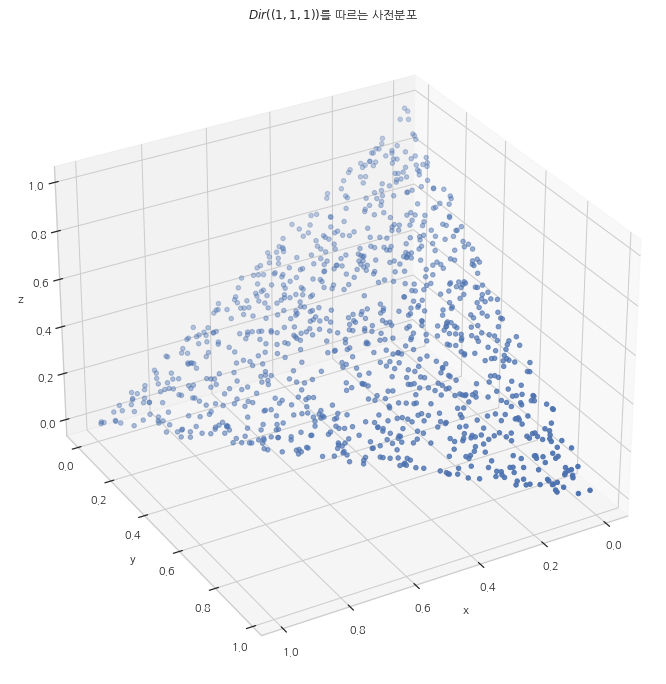

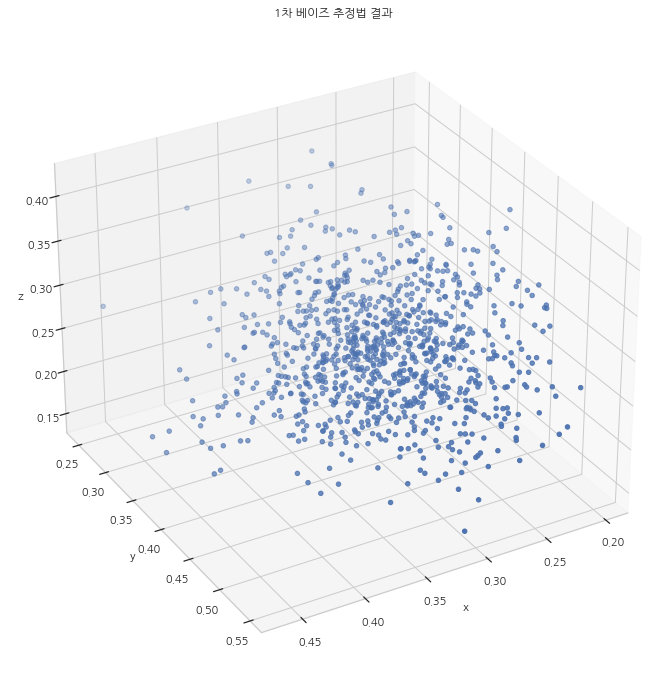

* 최빈값 : [0.31 0.42 0.27]
* 분산   : [0.00205921 0.00233836 0.00190332] 



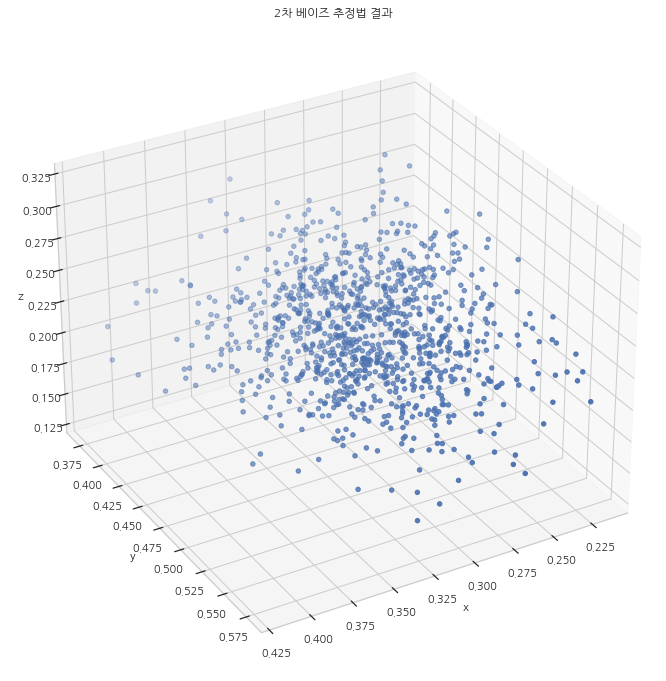

* 최빈값 : [0.3   0.475 0.225]
* 분산   : [0.00103038 0.00122189 0.00085908] 



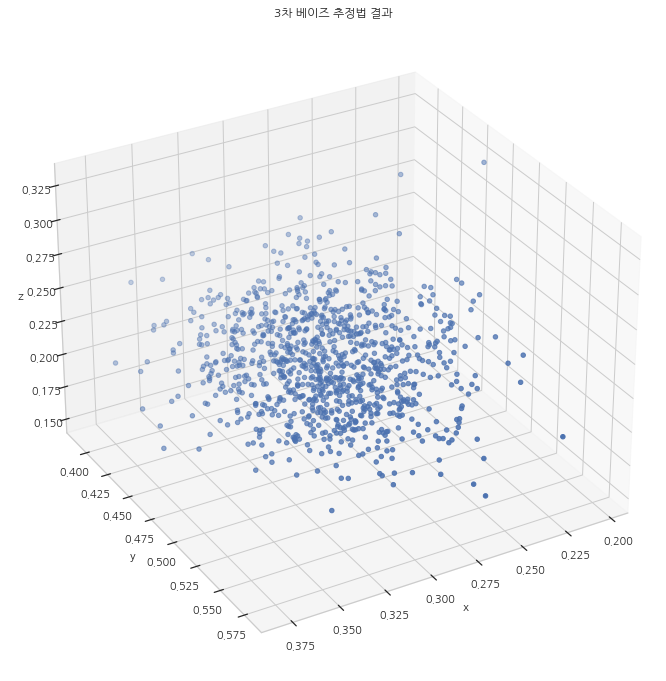

* 최빈값 : [0.29666667 0.48333333 0.22      ]
* 분산   : [0.00068685 0.00082128 0.00056654] 



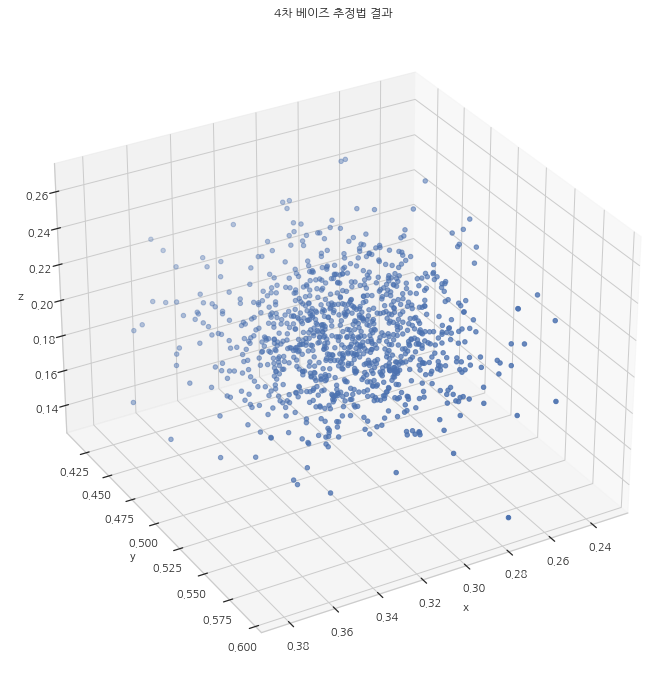

* 최빈값 : [0.3025 0.5025 0.195 ]
* 분산   : [0.00052249 0.00061881 0.0003901 ] 



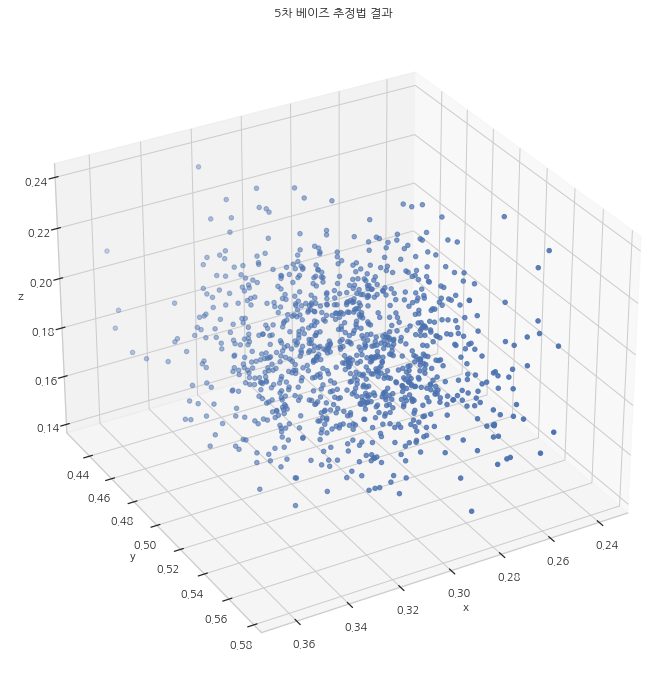

* 최빈값 : [0.302 0.51  0.188]
* 분산   : [0.00041839 0.00049587 0.00030396] 



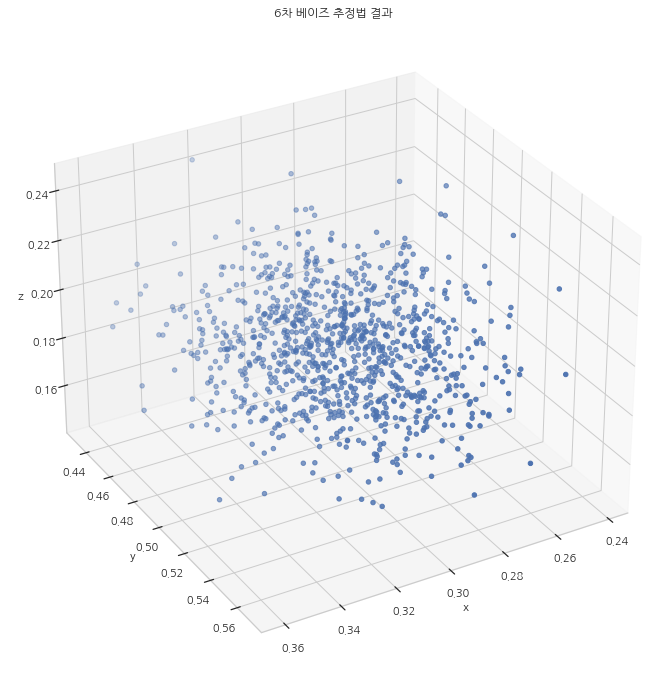

* 최빈값 : [0.30333333 0.50333333 0.19333333]
* 분산   : [0.00034997 0.0004139  0.00025891] 



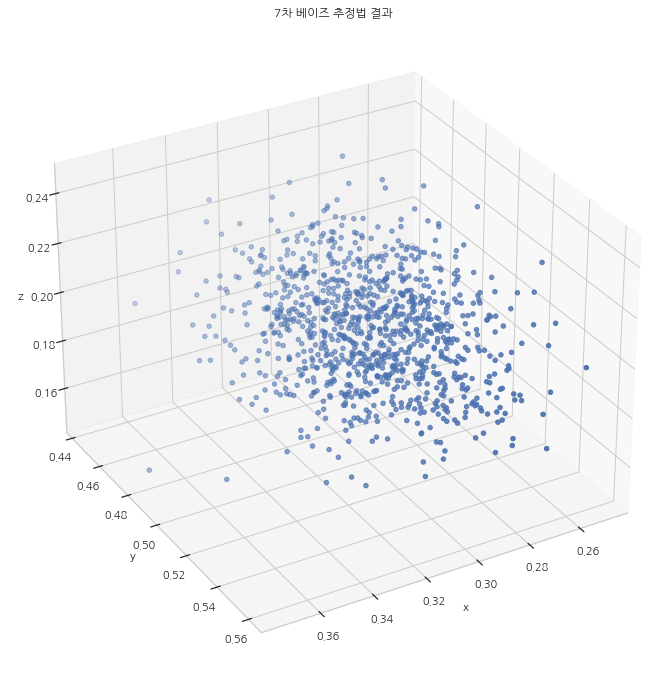

* 최빈값 : [0.30142857 0.50142857 0.19714286]
* 분산   : [0.00029918 0.00035511 0.00022533] 



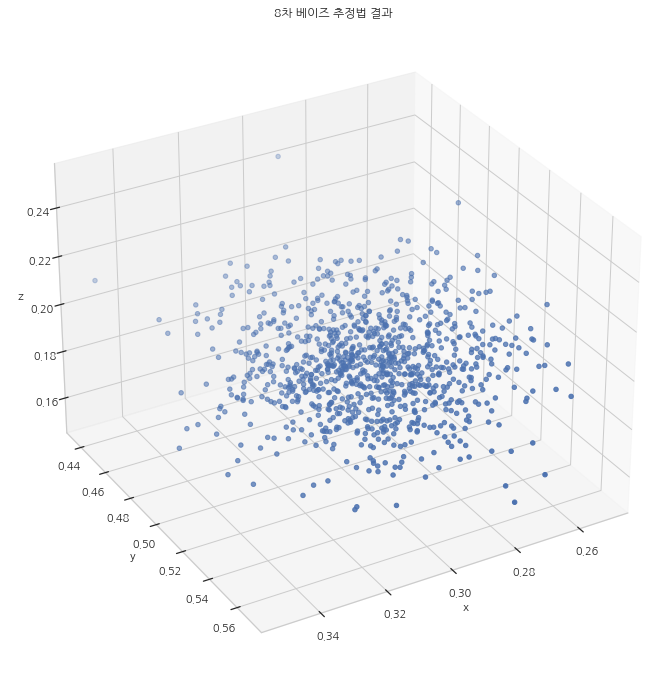

* 최빈값 : [0.29625 0.51125 0.1925 ]
* 분산   : [0.00025938 0.00031081 0.00019374] 



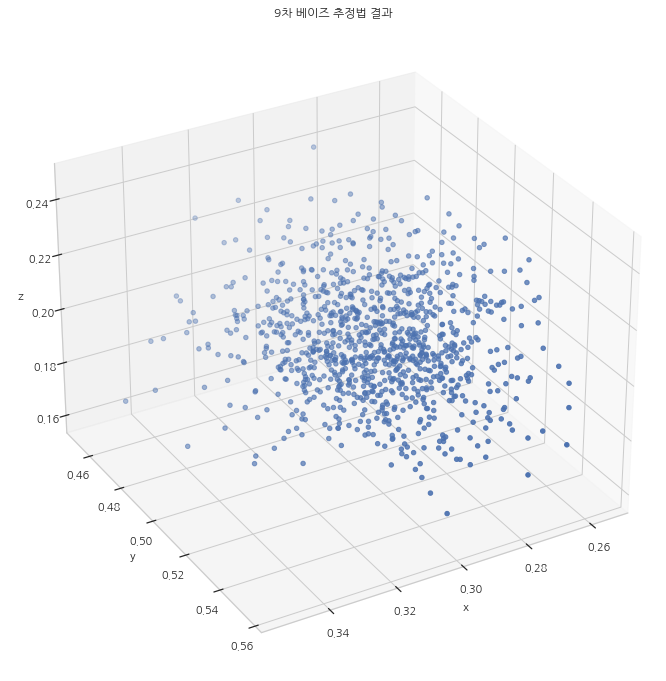

* 최빈값 : [0.29555556 0.50555556 0.19888889]
* 분산   : [0.00023037 0.00027652 0.00017655] 



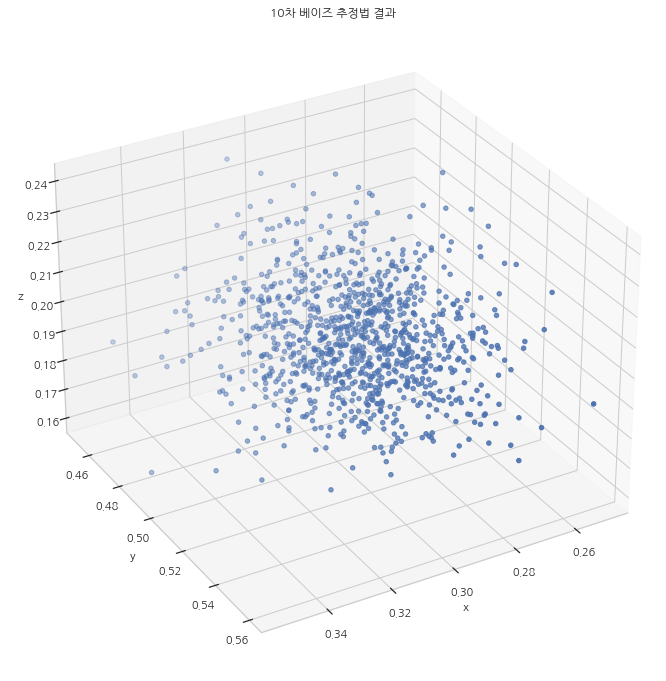

* 최빈값 : [0.297 0.505 0.198]
* 분산   : [0.000208   0.00024898 0.00015841] 



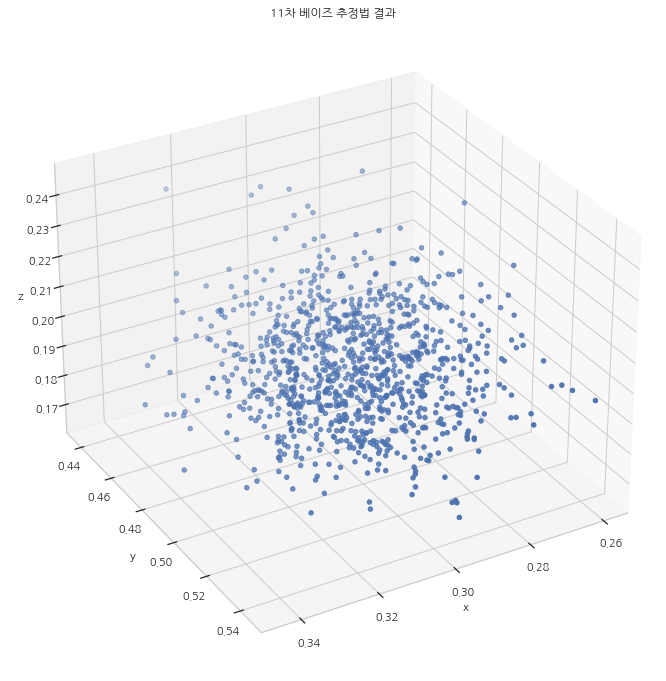

* 최빈값 : [0.30181818 0.49909091 0.19909091]
* 분산   : [0.0001909  0.00022645 0.00014463] 



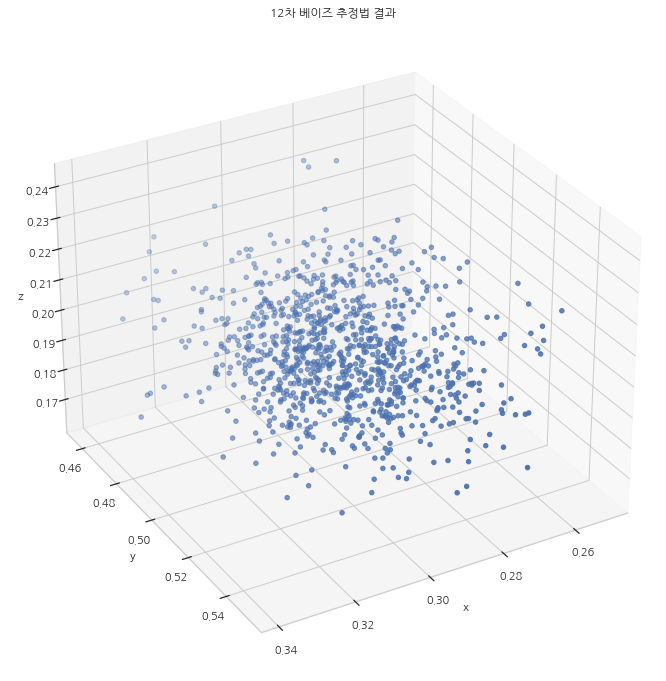

* 최빈값 : [0.29583333 0.50583333 0.19833333]
* 분산   : [0.00017305 0.00020762 0.00013223] 



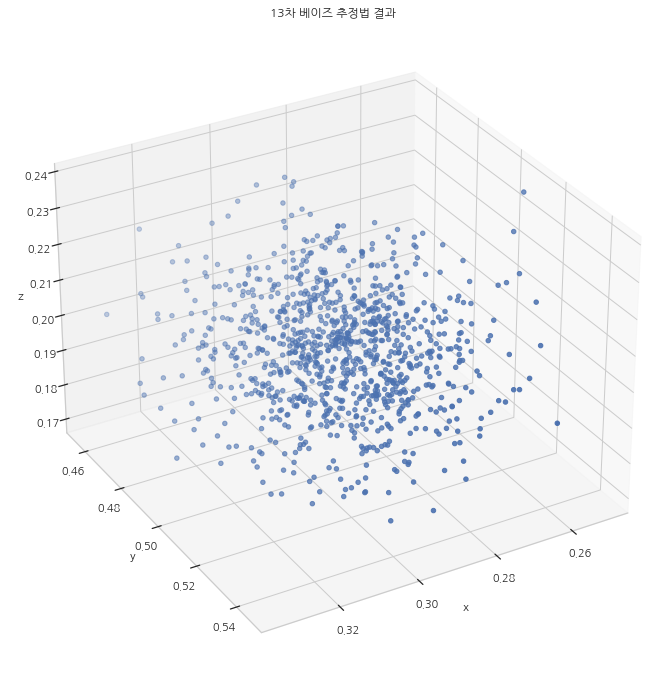

* 최빈값 : [0.29384615 0.50384615 0.20230769]
* 분산   : [-0.00016932 -0.00020395 -0.00013181] 



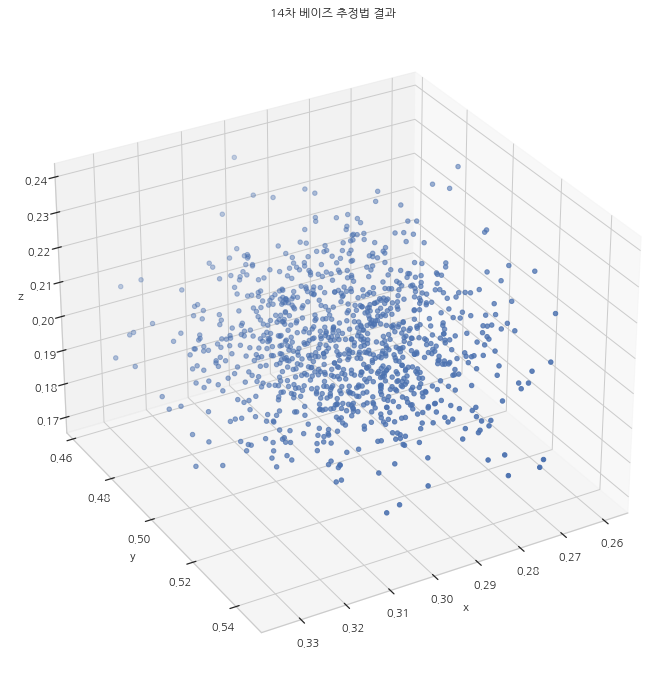

* 최빈값 : [0.295      0.50285714 0.20214286]
* 분산   : [-0.00026738 -0.00032135 -0.00020753] 



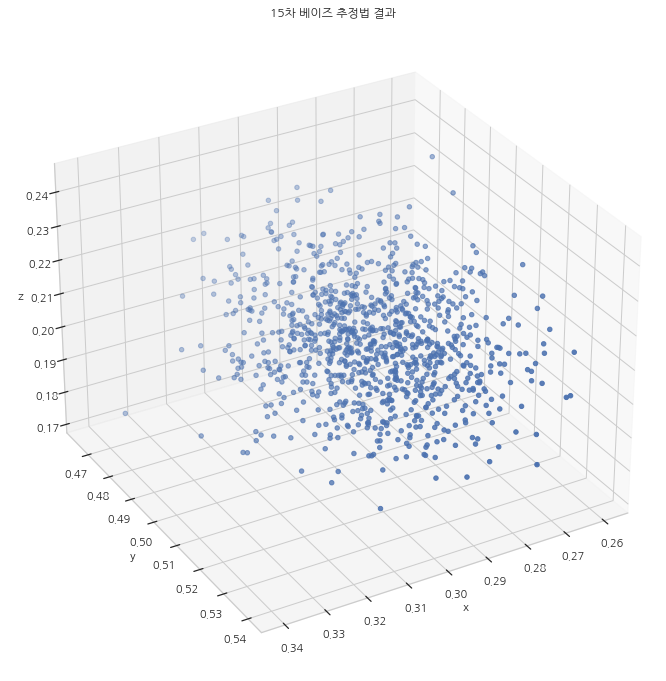

* 최빈값 : [0.29266667 0.50333333 0.204     ]
* 분산   : [-0.00052118 -0.00062929 -0.00040914] 



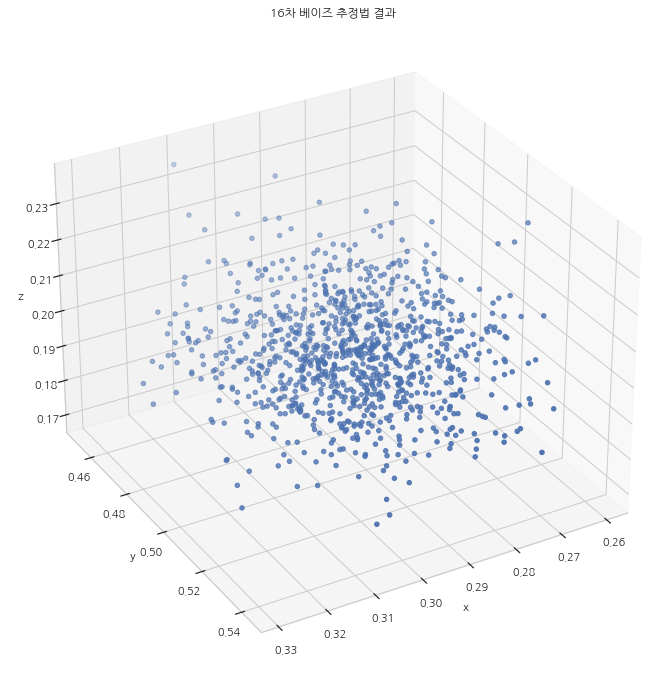

* 최빈값 : [0.295   0.50375 0.20125]
* 분산   : [-0.00308393 -0.0037064  -0.00238549] 



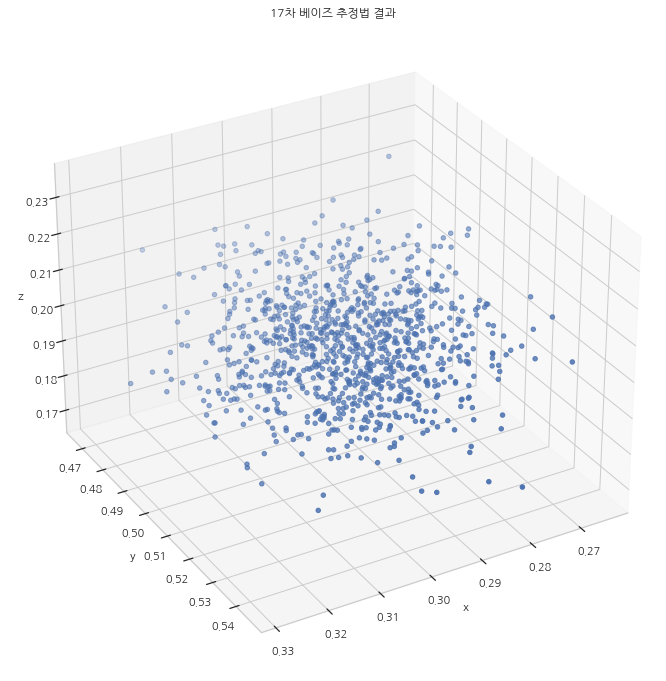

* 최빈값 : [0.29588235 0.50588235 0.19823529]
* 분산   : [0.00093401 0.00112052 0.0007131 ] 



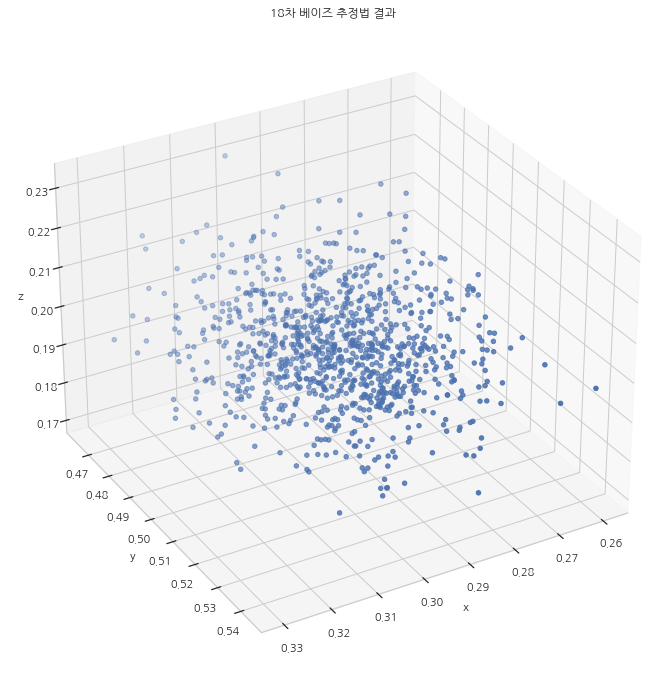

* 최빈값 : [0.29666667 0.50388889 0.19944444]
* 분산   : [0.00043223 0.00051779 0.00033099] 



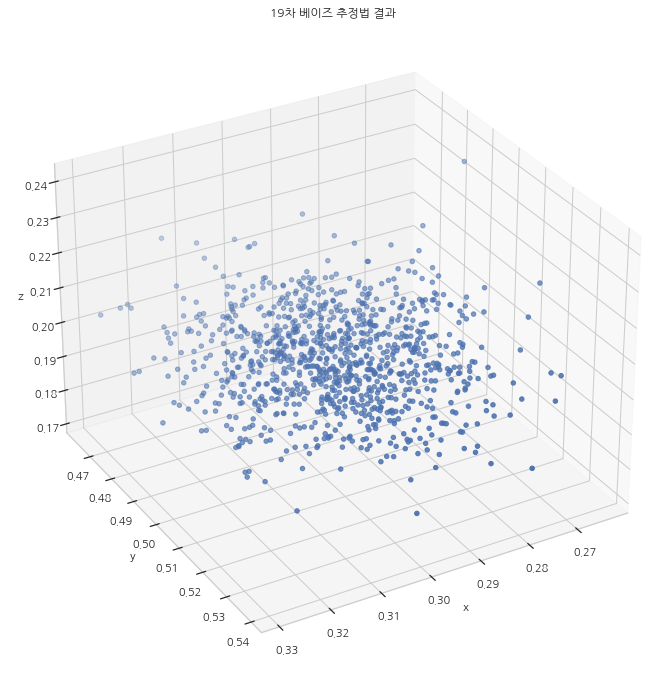

* 최빈값 : [0.29842105 0.50105263 0.20052632]
* 분산   : [-0.00044742 -0.0005342  -0.00034283] 



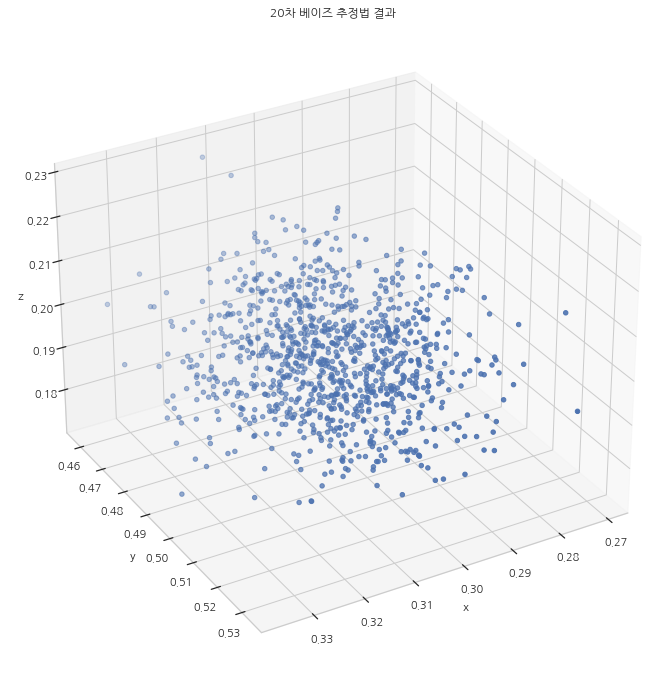

* 최빈값 : [0.3055 0.497  0.1975]
* 분산   : [-0.00154817 -0.001824   -0.00115732] 



In [43]:
# 예제 : 세 붓꽃의 비율을 카테고리분포로 나타내고자 함
#        해당 '붓꽃 종류'확률변수의 기대값 모수는 '(0.3, 0.5, 0.2)'임
#        (mu = (0.3, 0.5, 0.2))
#        아래 그림은 기대값 모수에 대한 베이즈 추정법을 실시한 결과임 

a = [1, 1, 1]

X = sp.stats.dirichlet(a).rvs(1000)

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = "3d")

x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

ax.scatter(x, y, z)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("$Dir((1, 1, 1))$를 따르는 사전분포")

ax.view_init(30, 60)
plt.show()

for i in range(20) :
    
    sample = sp.stats.multinomial(1, [0.3, 0.5, 0.2]).rvs(100).sum(axis=0)
    
    # 디리클레분포 모수 a 갱신
    a[0] = a[0] + sample[0]
    a[1] = a[1] + sample[1]
    a[2] = a[2] + sample[2]
    
    X = sp.stats.dirichlet(a).rvs(1000)
    
    fig = plt.figure(figsize = (12, 12))
    ax = fig.add_subplot(111, projection = "3d")

    x = X[:, 0]
    y = X[:, 1]
    z = X[:, 2]
    
    ax.scatter(x, y, z)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title("{}차 베이즈 추정법 결과".format(i + 1))

    ax.view_init(30, 60)
    plt.show()
    print("* 최빈값 :", (np.array(a) - 1) / (np.array(a).sum() - len(a)))
    print("* 분산   :", (np.array(a) * (np.array(a).sum() - np.array(a))) / (((np.array(a).sum())**2) * (np.array(a).sum() + 1)), "\n")


# 검정과 유의확률

In [2]:
"""

- 가설(hypothesis) : 모집단 확률변수의 확률분포에 대한 어떤 주장
- 검정(testing)    : 데이터 뒤에 숨어있는 확률변수의 분포에 대한 가설이 맞는지 틀린지 정량적으로 증명하는 작업
                     특히, 확률분포의 모수값이 특정한 값을 가진다는 가설을 검정하는 것을 '모수검정'이라 함

- 귀무가설(null hypothesis)        : 1. 모집단 확률변수의 확률분포에 대한 가설
                                     2. 우리가 주장하려는 가설이 아님
                                     3. 'H0'으로 표기함
                                     4. 귀무가설은 확률분포를 특정한 상태로 고정시켜야 하므로, 반드시 '등식'으로 표현되어야 함
                                     5. 특정한 실수값은 우리가 증명하고자 하는 가설에 대한 기준값이 되는 상수를 사용
                                        (ex : 도메인 지식으로써 이미 알려져있는 값)
                                        
- 대립가설(alternative hypothesis) : 1. 우리가 주장하려는 가설임(진실임을 증명하고자 하는 가설)
                                     2. 연구 중인 새 제품이 기존의 제품 성능보다 더 큰 성능을 보여주거나 불량률 등이 더 낮아진 것을 보이는
                                        것이 목표인 경우가 많기 때문에, '연구가설'이라고도 불림
                                        (이 경우, 기존 제품의 성능 혹은 목포 성능을 '귀무가설'로 설정함)
                                     3. 'Ha'로 표기함
                                        
- 귀무가설과 대립가설 설정 예시 : 1. 모수 theta가 어떤 특정한 값(theta0)이 아니라는 것을 증명하고 싶을 때
                                     -> H0 : theta = theta0, Ha : theta != theta0
                                  2. 모수 theta가 theta0보다 크다는 것을 증명하고 싶을 때
                                     -> H0 : theta = theta0, Ha : theta > theta0
                                  3. 모수 theta가 theta0보다 작다는 것을 증명하고 싶을 때
                                     -> H0 : theta = theta0, Ha : theta < theta0                                     

- 검정통계량 : 1. 통계적 가설의 진위여부를 검정하기 위해 표본으로부터 계산하는 통계량
               2. '표본 통계량'의 2차 가공물
               3. 표본 통계량은 확률변수이고 해당 확률변수를 변환하여 검정통계량을 산출하기 때문에, 검정통계량도 확률변수임
               4. 검정통계량 확률변수를 'T'로, 해당 확률변수에 의해서 실현된 표본값은 't'로 표기함

"""

pass

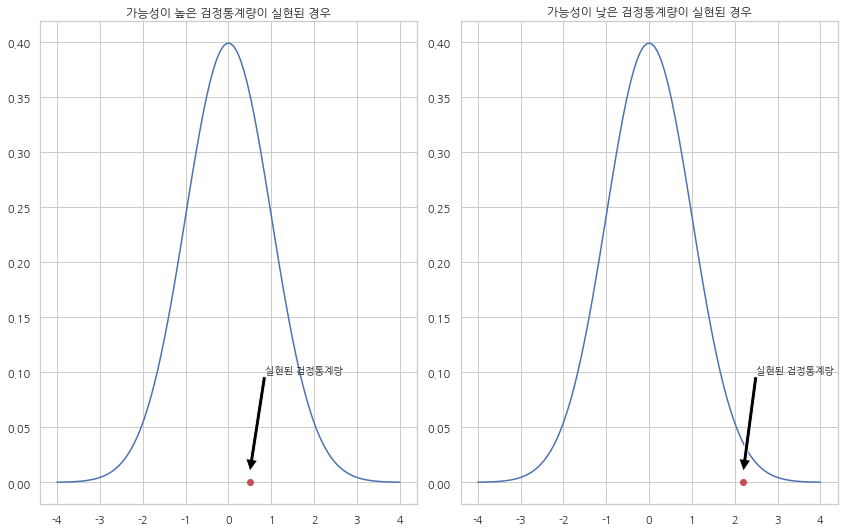

In [20]:
%matplotlib inline

"""

- 유의확률 : 1. 확률분포와 확률분포의 표본값 1개가 주어졌을 때, 그 확률분포에서 해당 표본값 혹은 더 희귀한 값이 나올 수 있는 확률
             2. 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리 부분에 해당하는 영역의 면적

- 유의확률값이 아주 작다는 것의 의미 : '귀무가설이 맞다는 가정하에' 현재의 검정통계량값이 나올 가능성이 매우 적다는 의미
                                       따라서, 유의확률값이 아주 작으면 귀무가설을 기각할 수 있음

"""

xx1 = np.linspace(-4, 4, 100)

plt.figure(figsize = (12, 7.5))

plt.subplot(121)
plt.title("가능성이 높은 검정통계량이 실현된 경우")
plt.plot(xx1, sp.stats.norm().pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate("실현된 검정통계량", xy = (0.5, 0.01), xytext = (0.85, 0.1), arrowprops = {"facecolor" : "black"}) # facecolor : 채우기 색

plt.subplot(122)
plt.title("가능성이 낮은 검정통계량이 실현된 경우")
plt.plot(xx1, sp.stats.norm().pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate("실현된 검정통계량", xy = (2.2, 0.01), xytext = (2.5, 0.1), arrowprops = {"facecolor" : "black"})

plt.tight_layout()
plt.show()

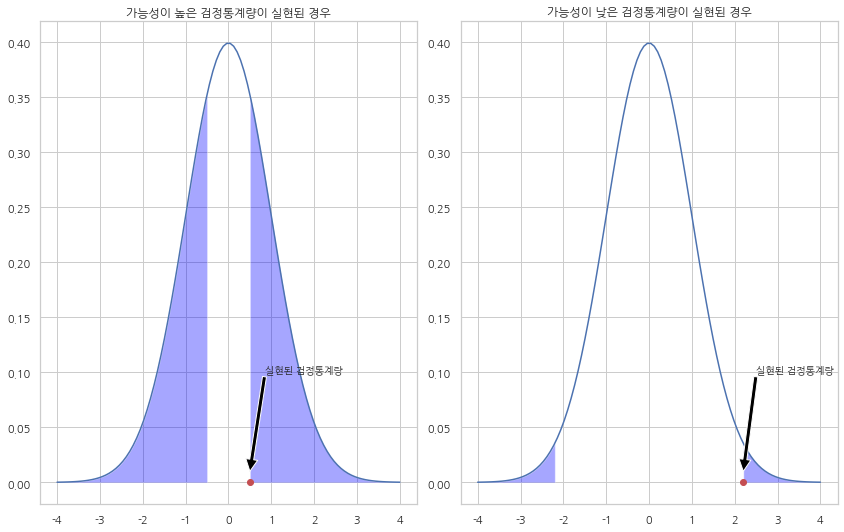

In [19]:
"""

- 양측검정 유의확률(two-side test p-value) : 통계량분포의 양 끝단의 면적

"""

xx1 = np.linspace(-4, 4, 100)

xx2 = np.linspace(-4, -0.5, 100)
xx3 = np.linspace(0.5, 4, 100)

plt.figure(figsize = (12, 7.5))

plt.subplot(121)
plt.title("가능성이 높은 검정통계량이 실현된 경우")
plt.plot(xx1, sp.stats.norm().pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate("실현된 검정통계량", xy = (0.5, 0.01), xytext = (0.85, 0.1), arrowprops = {"facecolor" : "black"})
plt.fill_between(xx2, sp.stats.norm().pdf(xx2), facecolor = "blue", alpha = 0.35) # alpha : 채우기 색 투명도
plt.fill_between(xx3, sp.stats.norm().pdf(xx3), facecolor = "blue", alpha = 0.35)

xx2 = np.linspace(-4, -2.2, 100)
xx3 = np.linspace(2.2, 4, 100)

plt.subplot(122)
plt.title("가능성이 낮은 검정통계량이 실현된 경우")
plt.plot(xx1, sp.stats.norm().pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate("실현된 검정통계량", xy = (2.2, 0.01), xytext = (2.5, 0.1), arrowprops = {"facecolor" : "black"})
plt.fill_between(xx2, sp.stats.norm().pdf(xx2), facecolor = "blue", alpha = 0.35) # alpha : 채우기 색 투명도
plt.fill_between(xx3, sp.stats.norm().pdf(xx3), facecolor = "blue", alpha = 0.35)

plt.tight_layout()
plt.show()

In [22]:
"""

- 단측검정(one-side test) :   만약 증명하고자 하는 대립가설이 부등식인 경우, 그 대립가설을 옹호하는 검정통계량값이 나올 확률을 구할 때
                              특정한 한 방향의 확률만을 구해야 함              
- 우측검정(right-side test) : 모수 theta가 특정한 값보다 크다는 것을 증명하는 경우
- 좌측검정(left-side test)  : 모수 theta가 특정한 값보다 작다는 것을 증명하는 경우


"""

pass

In [24]:
"""

- 유의수준 : 계산된 유의확률값에 대해 귀무가설을 기각하는지 채택하는지를 결정할 수 있는 '기준값'
             일반적으로 사용되는 유의수준은 '1%', '5%', '10%'등이 있음
- 기각역   : 유의수준에 대한 검정통계량

"""

pass

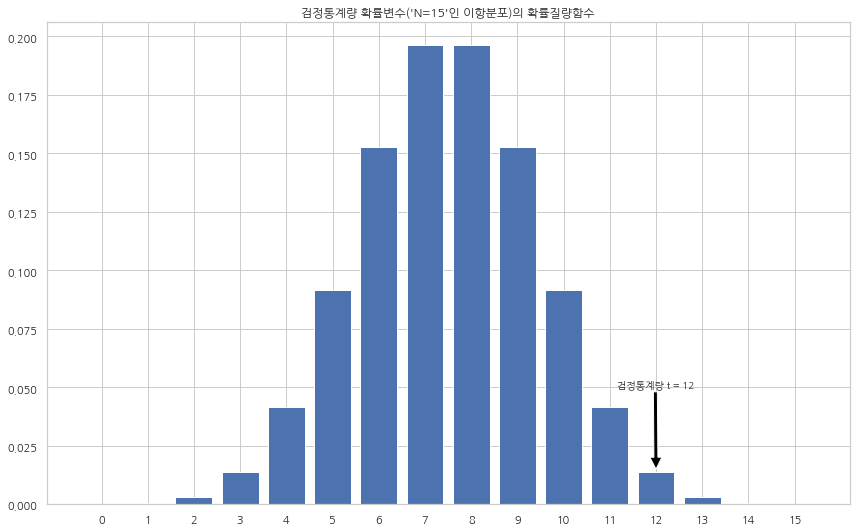

* 검정통계량 't = 12'에 대한 양측검정 유의확률 : 0.03515624999999997 

* 유의수준이 5%였으면 귀무가설이 기각되고, 유의수준이 1%였으면 귀무가설이 채택됨 

* 검정통계량 't = 12'에 대한 우측검정 유의확률 : 0.017578124999999986 

* 유의수준이 5%였으면 귀무가설이 기각되고, 유의수준이 1%였으면 귀무가설이 채택됨


In [51]:
# 동전의 앞면이 나오는 것을 베르누이분포로 모형화함
# 판단하고자하는 귀무가설 : 베르누이분포 모수 mu가 0.5(H0 : mu = 0.5)

# 동전을 던진 전체 횟수    : 15회
# 시행 후 앞면이 나온 횟수 : 12회

N = 15
mu = 0.5
rv = sp.stats.binom(N, mu)

xx = np.arange(N + 1)

plt.figure(figsize = (12, 7.5))
plt.bar(xx, rv.pmf(xx))
plt.title("검정통계량 확률변수('N=15'인 이항분포)의 확률질량함수")
plt.xticks([i for i in range(N + 1)])
plt.annotate("검정통계량 t = 12", xy = (12, 0.015), xytext = (11.15, 0.05), arrowprops = {"facecolor" : "black"})

plt.tight_layout()
plt.show()

print("* 검정통계량 't = 12'에 대한 양측검정 유의확률 :", 2 * sum(rv.pmf(xx)[12:]), "\n")
print("* 유의수준이 5%였으면 귀무가설이 기각되고, 유의수준이 1%였으면 귀무가설이 채택됨", "\n")
print("* 검정통계량 't = 12'에 대한 우측검정 유의확률 :", sum(rv.pmf(xx)[12:]), "\n")
print("* 유의수준이 5%였으면 귀무가설이 기각되고, 유의수준이 1%였으면 귀무가설이 채택됨")

* sample : [-0.025 -0.05   0.043 -0.037 -0.056]
* n : 5
* x_bar : -0.025
* s2 : 0.0012708
* s : 0.03985599076675927
* t : -1.4025921414082103 



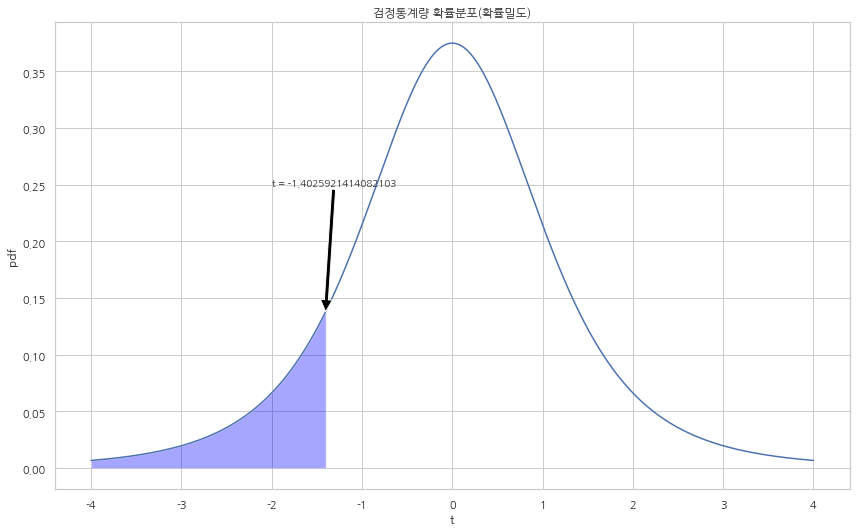

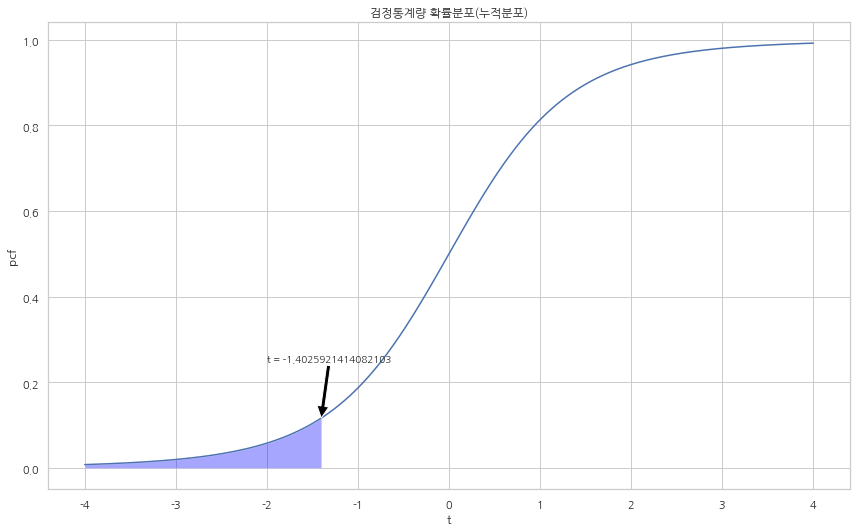

* 유의확률 : 0.11669216509589833
* 어떤 유의수준에서도 귀무가설이 채택됨(즉, 해당 주식이 장기적으로 손실을 낸다고 말할 수 없음) 



In [34]:
# 특정 주식의 수익률을 정규분포로 모형화함
# 판단하고자하는 귀무가설 : 해당 주식은 수익을 가져다주지 않음(H0 : mu = 0)
# 대립가설                : 해당 주식은 장기적으로 손실을 냄(Ha : mu < 0)

# 표본 = [-2.5%, -5%, 4.3%, -3.7%, -5.6%]
#      = [-0.025, -0.05, 0.043, -0.037, -0.056]

%matplotlib inline
import math

sample = np.array([-0.025, -0.05, 0.043, -0.037, -0.056])
n = len(sample)
x_bar = sample.mean()
s2 = sample.var()
s = sample.std(ddof=1)
t = (x_bar - 0) / (s / math.sqrt(n))

print("* sample :", sample)
print("* n :", n)
print("* x_bar :", x_bar)
print("* s2 :", s2)
print("* s :", s)
print("* t :", t, "\n")

rv_for_testing_statistic = sp.stats.t(loc = 0, scale = 1, df = n-1)

xx = np.linspace(-4, 4, 1000)
xx2 = np.linspace(-4, t, 100)

plt.figure(figsize = (12, 7.5))
plt.plot(xx, rv_for_testing_statistic.pdf(xx))
plt.annotate("t = {}".format(t), xy = (t, rv_for_testing_statistic.pdf(t)), xytext = (-2, 0.25), arrowprops = {"facecolor" : "black"})
plt.fill_between(xx2, rv_for_testing_statistic.pdf(xx2), facecolor = "blue", alpha = 0.35) # alpha : 채우기 색 투명도
plt.xlabel("t")
plt.ylabel("pdf")
plt.title("검정통계량 확률분포(확률밀도)")

plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 7.5))
plt.plot(xx, rv_for_testing_statistic.cdf(xx))
plt.annotate("t = {}".format(t), xy = (t, rv_for_testing_statistic.cdf(t)), xytext = (-2, 0.25), arrowprops = {"facecolor" : "black"})
plt.fill_between(xx2, rv_for_testing_statistic.cdf(xx2), facecolor = "blue", alpha = 0.35) # alpha : 채우기 색 투명도
plt.xlabel("t")
plt.ylabel("pcf")
plt.title("검정통계량 확률분포(누적분포)")

plt.tight_layout()
plt.show()

print("* 유의확률 :", rv_for_testing_statistic.cdf(t))
print("* 어떤 유의수준에서도 귀무가설이 채택됨(즉, 해당 주식이 장기적으로 손실을 낸다고 말할 수 없음)", "\n")

# scipy 패키지를 사용한 검정

In [44]:
"""

- 이항검정 : '이항분포'를 이용하여 베르누이 확률변수의 모수 mu에 대한 가설을 검정하는 방법
- 이항검정은 오직 두 가지 표본값(0, 1)을 가지는 확률변수의 분포를 판단하는데 도움을 줌
- 예를 들어, 어떤 자격시험 합격자 10명 중 7명이 대학졸업자라는 것을 뜻하는 표본이 주어졌을 때,
  해당 표본으로부터 '대학졸업자가 비졸업자보다 실력이 좋다.'라고 주장할 수 있는지에 대한 검정은 '이항검정'으로 실시됨

"""

# 예제1 : 실제 mu가 0.5인 베르누이 확률변수의 시뮬레이션을 통해 이항검정을 실습하기
#         표본의 크기   : 10
#         1이 나온 횟수 : 7

# H0 : mu = 0.5

np.random.seed(0)

n = 10
mu = 0.5

rv = sp.stats.bernoulli(0.5)
sample = rv.rvs(10)
one_cnt = sum(sample)

print("* sample :", sample)
print("* one count :", one_cnt, "\n")

p_value = sp.stats.binom_test(one_cnt, n = n, p = 0.5, alternative = "two-sided")
print("* p-value :", p_value)
print("* 해당 p-value에 따라, 어떤 유의수준에 대해서도 귀무가설을 기각할 수 없음")

* sample : [1 1 1 1 0 1 0 1 1 0]
* one count : 7 

* p-value : 0.34375
* 해당 p-value에 따라, 어떤 유의수준에 대해서도 귀무가설을 기각할 수 없음


In [73]:
# 예제2 : 'mu = 0.5'인 확률변수에서 표본의 크기가 100이 되도록 시뮬레이션하여, 1이 49번 나온 경우에 대해 이항검정을 실시

np.random.seed(0)

n = 100
mu = 0.5

rv = sp.stats.bernoulli(mu)
sample = rv.rvs(n)
one_cnt = sum(sample)

print("* sample :")
print(sample)
print("* one count :", one_cnt, "\n")

p_value = sp.stats.binom_test(one_cnt, n = n, p = 0.5, alternative = "two-sided")
print("* p-value :", p_value)
print("* 해당 p-value에 따라, 어떤 유의수준에 대해서도 귀무가설을 기각할 수 없음")

* sample :
[1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0]
* one count : 49 

* p-value : 0.9204107626128211
* 해당 p-value에 따라, 어떤 유의수준에 대해서도 귀무가설을 기각할 수 없음


In [78]:
# 예제3 : 'mu = 0.35'인 확률변수에서 표본의 크기가 100이 되도록 시뮬레이션하여, 1이 31번 나온 경우에 대해 이항검정을 실시
#          H0 : mu = 0.5

np.random.seed(0)

n = 100
mu = 0.35

rv = sp.stats.bernoulli(mu)
sample = rv.rvs(n)
one_cnt = sum(sample)

print("* sample :")
print(sample)
print("* one count :", one_cnt, "\n")

p_value = sp.stats.binom_test(one_cnt, n = n, p = 0.5, alternative = "two-sided")
print("* p-value :", p_value)
print("* 해당 p-value에 따라, 어떤 유의수준에 대해서도 귀무가설을 기각할 수 있음")

* sample :
[0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0]
* one count : 31 

* p-value : 0.00018314322488235366
* 해당 p-value에 따라, 어떤 유의수준에 대해서도 귀무가설을 기각할 수 있음


In [92]:
# 연습문제1 : 'n = 10'이고 유의수준이 '10%'라면, 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있는가?

# H0 : mu = 0.5
# Ha : mu != 0.5

n = 10
target_cnt = 0
for i in range(11):
    
    p_value = sp.stats.binom_test(i, n = n, p = 0.5, alternative = "two-sided")
    if p_value < 0.1 :
        
        print(red("앞면이 {}번 나왔을 때의 p-value : ".format(i) + str(p_value), "bold"))
        target_cnt = target_cnt + 1
        
    else :
         
        print("앞면이 {}번 나왔을 때의 p-value :".format(i), p_value)
        
    if i == 10:
        
        print("\n")
        
print("* 앞면이 0번, 1번, 9번, 10번 나왔을 때, 귀무가설(mu = 0.5, 주어진 동전이 공정함)을 기각할 수 있음")
print("* 동전이 공정하다고 얘기할 수 있는 횟수 :", n - target_cnt)        
print("* 동전이 공정하다고 얘기할 수 있는 횟수의 비율 :", (n - target_cnt) / n)

앞면이 0번 나왔을 때의 p-value : 0.001953125
앞면이 1번 나왔을 때의 p-value : 0.021484375
앞면이 2번 나왔을 때의 p-value : 0.109375
앞면이 3번 나왔을 때의 p-value : 0.34375
앞면이 4번 나왔을 때의 p-value : 0.75390625
앞면이 5번 나왔을 때의 p-value : 1.0
앞면이 6번 나왔을 때의 p-value : 0.75390625
앞면이 7번 나왔을 때의 p-value : 0.34375
앞면이 8번 나왔을 때의 p-value : 0.109375
앞면이 9번 나왔을 때의 p-value : 0.021484375
앞면이 10번 나왔을 때의 p-value : 0.001953125


* 앞면이 0번, 1번, 9번, 10번 나왔을 때, 귀무가설(mu = 0.5, 주어진 동전이 공정함)을 기각할 수 있음
* 동전이 공정하다고 얘기할 수 있는 횟수 : 6
* 동전이 공정하다고 얘기할 수 있는 횟수의 비율 : 0.6


In [93]:
# 연습문제2 : 'n = 1000'이고 유의수준이 '10%'라면, 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있는가?
#             이때, '1 ~ n'의 횟수 범위 중에서 동전이 공정하다고 이야기할 수 있는 횟수의 범위(비율)는 'n = 10'일때와 비교하여 넓은가 혹은 좁은가?

# H0 : mu = 0.5
# Ha : mu != 0.5

n = 1000
target_cnt = 0
for i in range(1001):
    
    p_value = sp.stats.binom_test(i, n = n, p = 0.5, alternative = "two-sided")
    if p_value < 0.1 :
        
        print(red("앞면이 {}번 나왔을 때의 p-value : ".format(i) + str(p_value), "bold"))
        target_cnt = target_cnt + 1
        
    else :
         
        print("앞면이 {}번 나왔을 때의 p-value :".format(i), p_value)
    
    if i == 1000:
        
        print("\n")
        
print("* 동전이 공정하다고 얘기할 수 있는 횟수 :", n - target_cnt)        
print("* 동전이 공정하다고 얘기할 수 있는 횟수의 비율 :", (n - target_cnt) / n)

앞면이 0번 나왔을 때의 p-value : 1.8665272370064378e-301
앞면이 1번 나왔을 때의 p-value : 1.8683937642434442e-298
앞면이 2번 나왔을 때의 p-value : 9.341987486489591e-296
앞면이 3번 나왔을 때의 p-value : 3.110894301402977e-293
앞면이 4번 나왔을 때의 p-value : 7.761728085450875e-291
앞면이 5번 나왔을 때의 p-value : 1.5477010612588704e-288
앞면이 6번 나왔을 때의 p-value : 2.569209738125176e-286
앞면이 7번 나왔을 때의 p-value : 3.6519925704491257e-284
앞면이 8번 나왔을 때의 p-value : 4.53766538789999e-282
앞면이 9번 나왔을 때의 p-value : 5.006639207765595e-280
앞면이 10번 나왔을 때의 p-value : 4.9666775829792705e-278
앞면이 11번 나왔을 때의 p-value : 4.474616847641246e-276
앞면이 12번 나왔을 때의 p-value : 3.691642519327685e-274
앞면이 13번 나왔을 때의 p-value : 2.808557651840244e-272
앞면이 14번 나왔을 때의 p-value : 1.9820926413045145e-270
앞면이 15번 나왔을 때의 p-value : 1.3042549036657826e-268
앞면이 16번 나왔을 때의 p-value : 8.037722162828744e-267
앞면이 17번 나왔을 때의 p-value : 4.657306589688741e-265
앞면이 18번 나왔을 때의 p-value : 2.5460850485654574e-263
앞면이 19번 나왔을 때의 p-value : 1.317313885738568e-261
앞면이 20번 나왔을 때의 p-value : 6.468270526489397e

앞면이 329번 나왔을 때의 p-value : 1.2644533496755971e-27
앞면이 330번 나왔을 때의 p-value : 2.582116986940289e-27
앞면이 331번 나왔을 때의 p-value : 5.249291116750507e-27
앞면이 332번 나왔을 때의 p-value : 1.0623807661459751e-26
앞면이 333번 나왔을 때의 p-value : 2.1405120129522658e-26
앞면이 334번 나왔을 때의 p-value : 4.293546568700491e-26
앞면이 335번 나왔을 때의 p-value : 8.573907804904026e-26
앞면이 336번 나왔을 때의 p-value : 1.7045456084890622e-25
앞면이 337번 나왔을 때의 p-value : 3.3737171390263016e-25
앞면이 338번 나왔을 때의 p-value : 6.647861295080644e-25
앞면이 339번 나왔을 때의 p-value : 1.3041617729617298e-24
앞면이 340번 나왔을 때의 p-value : 2.547183244499458e-24
앞면이 341번 나왔을 때의 p-value : 4.953031253927402e-24
앞면이 342번 나왔을 때의 p-value : 9.588861190222728e-24
앞면이 343번 나왔을 때의 p-value : 1.8482085965973162e-23
앞면이 344번 나왔을 때의 p-value : 3.546711119175404e-23
앞면이 345번 나왔을 때의 p-value : 6.77632750993244e-23
앞면이 346번 나왔을 때의 p-value : 1.2890196688966583e-22
앞면이 347번 나왔을 때의 p-value : 2.4413166265589307e-22
앞면이 348번 나왔을 때의 p-value : 4.603529021253013e-22
앞면이 349번 나왔을 때의 p-value : 8.6429

앞면이 666번 나왔을 때의 p-value : 4.293546568700491e-26
앞면이 667번 나왔을 때의 p-value : 2.1405120129522658e-26
앞면이 668번 나왔을 때의 p-value : 1.0623807661459751e-26
앞면이 669번 나왔을 때의 p-value : 5.249291116750507e-27
앞면이 670번 나왔을 때의 p-value : 2.582116986940289e-27
앞면이 671번 나왔을 때의 p-value : 1.2644533496755971e-27
앞면이 672번 나왔을 때의 p-value : 6.164220526602666e-28
앞면이 673번 나왔을 때의 p-value : 2.9915673016318163e-28
앞면이 674번 나왔을 때의 p-value : 1.4453113465194731e-28
앞면이 675번 나왔을 때의 p-value : 6.951248519768794e-29
앞면이 676번 나왔을 때의 p-value : 3.3281255979784134e-29
앞면이 677번 나왔을 때의 p-value : 1.586239577886645e-29
앞면이 678번 나왔을 때의 p-value : 7.526043186403552e-30
앞면이 679번 나왔을 때의 p-value : 3.55459497494939e-30
앞면이 680번 나왔을 때의 p-value : 1.6712277818891815e-30
앞면이 681번 나왔을 때의 p-value : 7.821676804592202e-31
앞면이 682번 나왔을 때의 p-value : 3.644008192879808e-31
앞면이 683번 나왔을 때의 p-value : 1.6899373906273699e-31
앞면이 684번 나왔을 때의 p-value : 7.80135757953496e-32
앞면이 685번 나왔을 때의 p-value : 3.584879252668791e-32
앞면이 686번 나왔을 때의 p-value : 1.639759

In [20]:
# 연습문제 9.5.2 - 1

from pandasql import sqldf

tips = sns.load_dataset("tips")
df_female = sqldf("select * from tips where sex = 'Female'")

df_female_smok_col = sqldf("select case when smoker = 'No' then 0 else 1 end as smoker from df_female")
list_female_smok_col = df_female_smok_col["smoker"].tolist()

n = len(list_female_smok_col)
is_smoke_cnt = sum(list_female_smok_col)

print("* n :", n)
print("* is_smoke_cnt :", is_smoke_cnt, "\n")

p_value = sp.stats.binom_test(is_smoke_cnt, n = n, p = 0.5, alternative = "less")
print("* p_value :", p_value)
print("* 유의수준이 10%일 때, H0(mu = 0.5)를 기각할 수 있음")

* n : 87
* is_smoke_cnt : 33 

* p_value : 0.015709055116923054
* 유의수준이 10%일 때, H0(mu = 0.5)를 기각할 수 있음


In [23]:
# 연습문제 9.5.2 - 2

from pandasql import sqldf

tips = sns.load_dataset("tips")
df_female_and_dinner = sqldf("select * from tips where sex = 'Female' and time = 'Dinner'")

df_female_and_dinner_smok_col = sqldf("select case when smoker = 'No' then 0 else 1 end as smoker from df_female_and_dinner")
list_female_and_dinner_smok_col = df_female_and_dinner_smok_col["smoker"].tolist()

n = len(list_female_and_dinner_smok_col)
is_smoke_cnt = sum(list_female_and_dinner_smok_col)

print("* n :", n)
print("* is_smoke_cnt :", is_smoke_cnt, "\n")

p_value = sp.stats.binom_test(is_smoke_cnt, n = n, p = 0.5, alternative = "less")
print("* p_value :", p_value)
print("* 유의수준이 10%일 때, H0(mu = 0.5)를 기각할 수 없음")

* n : 52
* is_smoke_cnt : 23 

* p_value : 0.24422783468994602
* 유의수준이 10%일 때, H0(mu = 0.5)를 기각할 수 없음


In [30]:
# 연습문제 9.5.3

n_list = list(range(1000, 2000))

for n in n_list : 
    
    one_cnt = n * 0.7
    p_value = sp.stats.binom_test(one_cnt, n = n, p = 2/3, alternative = 'greater')
    if p_value < 0.01 :
        
        print("* n :", n)
        print("* one_cnt :", one_cnt)
        print("p-value :", p_value, "\n")
        
        break
        
print("* 응답자수가 {}명일 때, 전체 국민의 2/3가 넘게 찬성한다는 결론을 얻을 수 있음".format(n))      

* n : 1100
* one_cnt : 770.0
p-value : 0.009906572889331666 

* 응답자수가 1100명일 때, 전체 국민의 2/3가 넘게 찬성한다는 결론을 얻을 수 있음


In [1]:
"""

- 카이제곱검정 : 카테고리 확률분포의 모수 mu = (mu_1, ..., mu_k)에 대한 가설을 조사하는 검정 방법
              '적합도검정'이라고도 불림
              원래 카테고리 k가 나와야 할 횟수의 기대값(m_k)과 실제 나온 횟수(x_k)의 차이를 이용하여 검정통계량을 산출함
              해당 검정통계량은 '카이제곱분포'를 따름

"""

pass

In [5]:
# 예제1 : n = 10, H0 : mu = (0.25, 0.25, 0.25, 0.25), 실제 데이터 = (0, 3, 5, 2)인 경우에 대해,
#        카이제곱검정 실시

np.random.seed(0)

n = 10
k = 4
mu_0 = np.ones(k) / k

x = np.random.choice(k, n, p = mu_0)
n = np.bincount(x, minlength = k)
print("* x :", x)
print("* n :", n, "\n")

p_value = sp.stats.chisquare(n)
print(p_value)

* x : [2 2 2 2 1 2 1 3 3 1]
* n : [0 3 5 2] 

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)


In [13]:
# 예제2 : n = 100, H0 : mu = (0.35, 0.30, 0.20, 0.15), 실제 데이터 = (37, 32, 20, 11)인 경우에 대해,
#        카이제곱검정 실시

np.random.seed(0)

n = 100
k = 4
mu_0 = (0.35, 0.30, 0.20, 0.15)

x = np.random.choice(k, n, p = mu_0)
n = np.bincount(x, minlength = k)
print("* x :")
print(x)
print("* n :", n, "\n")

p_value = sp.stats.chisquare(n, f_exp = mu_0)
print(p_value)

* x :
[1 2 1 1 1 1 1 3 3 1 2 1 1 3 0 0 0 2 2 3 3 2 1 2 0 1 0 3 1 1 0 2 1 1 0 1 1
 1 3 2 1 1 2 0 2 2 0 0 0 1 1 1 3 0 0 0 2 0 1 0 0 0 2 0 0 1 2 0 2 0 3 1 3 1
 2 0 0 0 0 0 0 1 0 2 1 0 1 0 1 3 0 2 0 2 0 0 1 0 2 0]
* n : [37 32 20 11] 



ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
99.00000000000001